[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/?) by Andreas C. Müller & Sarah Guido

# 1. Introduction

## A First Application: Classifying Iris Species

In [1]:
# !pip install mglearn

In [8]:
import sys
print('Python version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib as plt
print('matplotlib version: {}'.format(plt.__version__))
%matplotlib inline

import matplotlib.pyplot as plt
      
import numpy as np
print('NumPy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))
      
import IPython
print('IPython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))
      
import mglearn
print('mglearn version: {}'.format(mglearn.__version__))

Python version: 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
pandas version: 1.5.3
matplotlib version: 3.7.0
NumPy version: 1.23.5
scipy version: 1.10.0
IPython version: 8.10.0
scikit-learn version: 1.2.1
mglearn version: 0.1.9


### Meet the Data: Iris Dataset

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset: \n{}:".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']):


In [5]:
print(iris_dataset['DESCR'][:193] + '\n...' )

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print('Target names: \n{}'.format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [7]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print('Type of data: \n{}'.format(type(iris_dataset['data'])))

Type of data: 
<class 'numpy.ndarray'>


In [9]:
print('Shape of data \n{}'.format(iris_dataset['data'].shape))

Shape of data 
(150, 4)


In [10]:
print('First five columns of data: \n{}'.format(iris_dataset['data'][:5]))

First five columns of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print('Type of target {}'.format(type(iris_dataset['target'])))

Type of target <class 'numpy.ndarray'>


In [12]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [13]:
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Measuring Success: Training and Testing Data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'], 
    random_state=0)

NameError: name 'iris_dataset' is not defined

In [16]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [17]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### First Things First: Look at Your Data

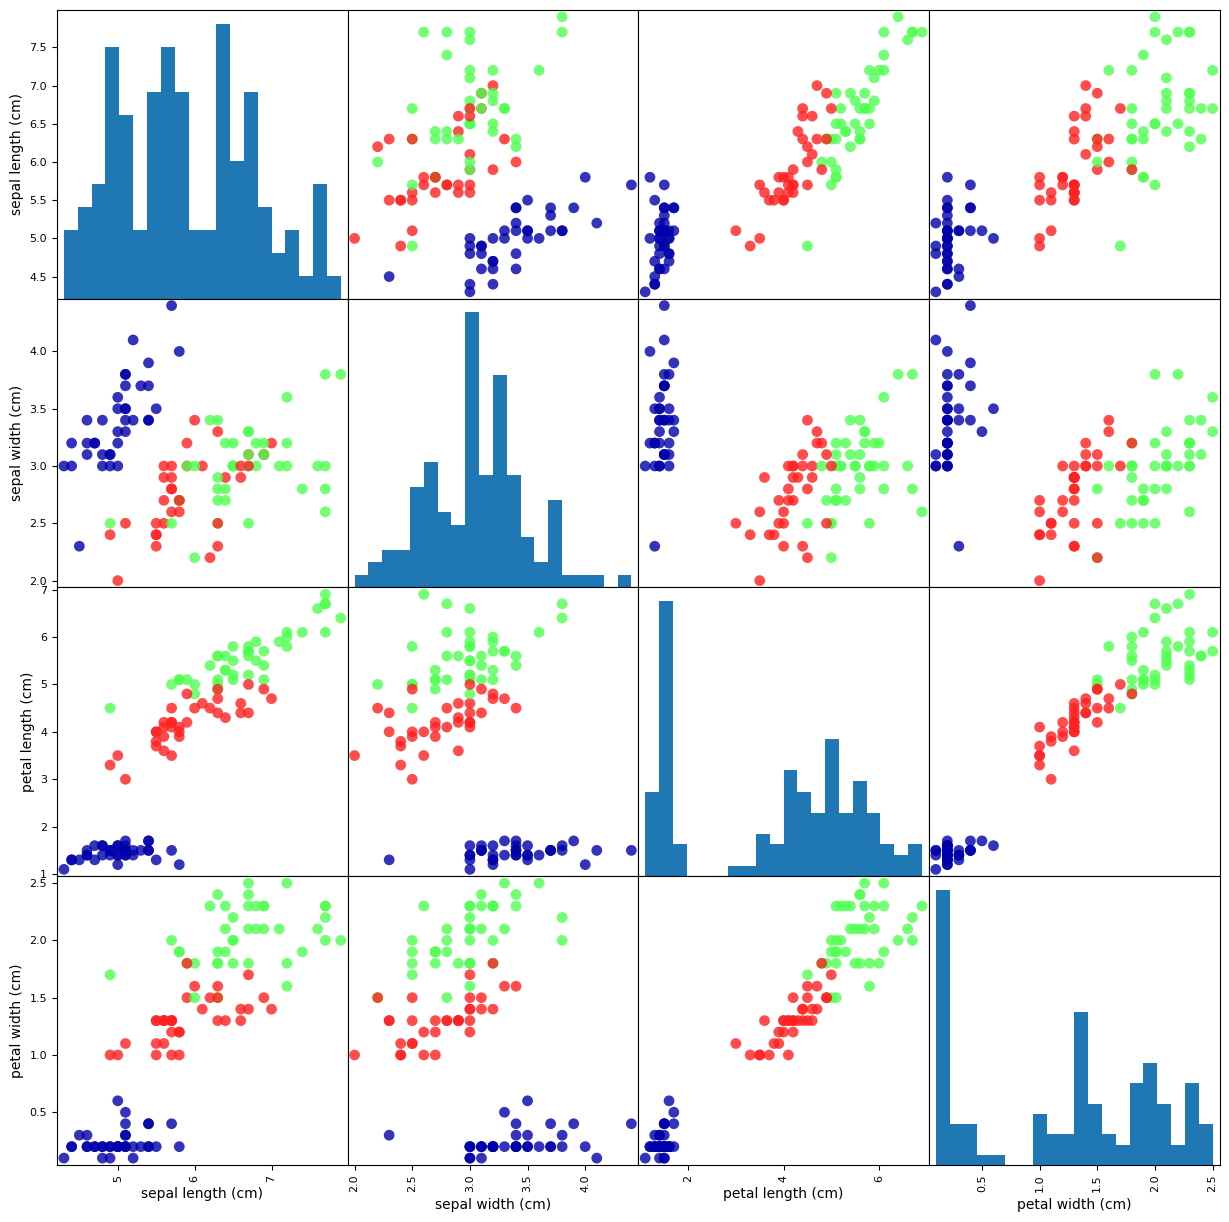

In [18]:
# create dataframe from data in X_train
# label cols using strings in iriis_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, 
                              columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train

grr = pd.plotting.scatter_matrix(iris_dataframe,
                                 c=y_train,
                                 figsize=(15,15),
                                 marker='o',
                                 hist_kwds={'bins':20},
                                 s=60,
                                 alpha=0.8,
                                 cmap=mglearn.cm3)

### Build First Model: k-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making Predictions

In [22]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [23]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(
    iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the Model

In [24]:
y_pred = knn.predict(X_test)
print('Test set predictions: \n {}'.format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print('Test set score: {:.2f}'.format(
    np.mean(y_pred == y_test)))

Test set score: 0.97


In [26]:
print('Test set score: {:.2f}'.format(
    knn.score(X_test, y_test)))

Test set score: 0.97


In [27]:
# summary code

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],
    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Test set score: {:.2f}'.format(knn.score(
    X_test, y_test)))

Test set score: 0.97


# 2. Supervised Learning

Two major ML problems: 
- classification (categories)
    - binary classificatoin
    - multiclass classification
- regression (continuity)

generalizability – model to predict on unseen data
overfitting – model too complex, fit too well to training data
underfitting – model too simple

## Supervised ML Algorithms
### Some Sample Datasets

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

X.shape: (26, 2)


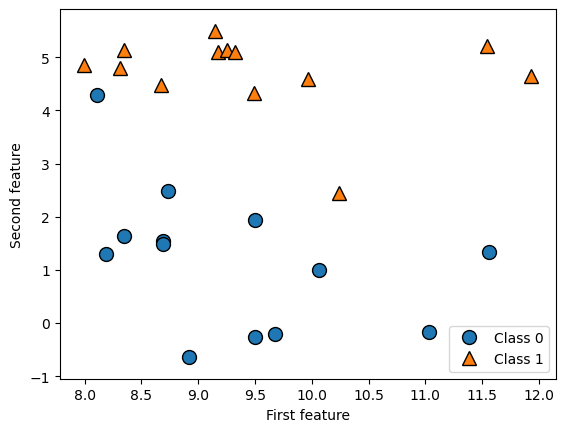

In [29]:
# forge dataset 

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print('X.shape: {}'.format(X.shape))

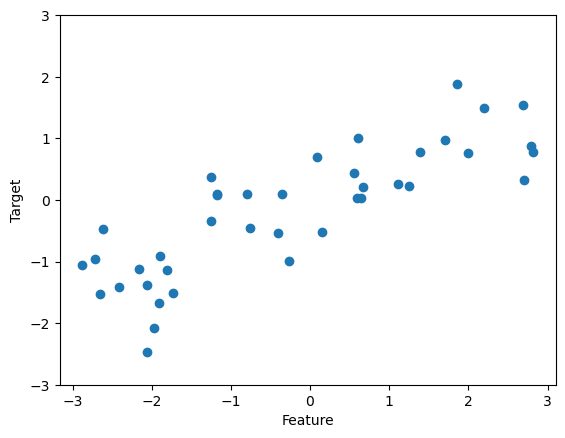

In [30]:
# wave dataset

X,y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target');

In [31]:
# breast cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [32]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [33]:
print('Sample counts per class: \n{}'.format({
    n: v for n, 
    v in zip(
        cancer.target_names,
        np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [34]:
print('Feature names: \n{}'.format(
    cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [35]:
# Boston housing dataset – removed
# from sklearn.datasets import fetch_california_housing

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print('Data shape: {}'.format(housing.data.shape))

Data shape: (20640, 8)


In [36]:
# X, y = mglearn.datasets.load_extended_california

## k-Nearest Neighbors
### k-Neighbors classification

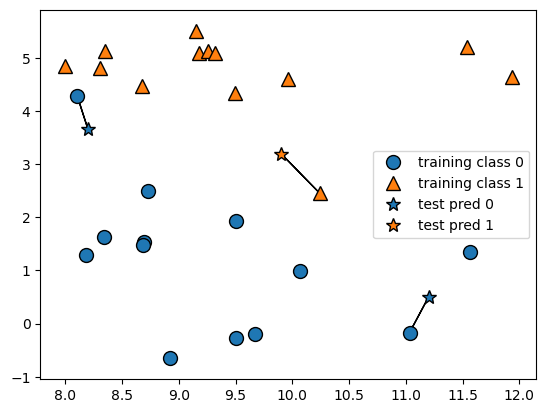

In [37]:
# forge dataset 
mglearn.plots.plot_knn_classification(
    n_neighbors=1)

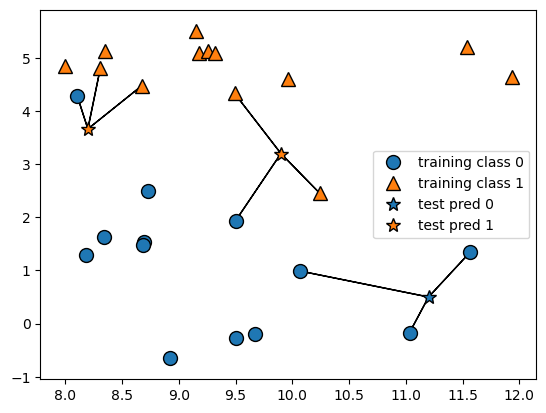

In [38]:
mglearn.plots.plot_knn_classification(
    n_neighbors=3)

In [39]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [42]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### Analyzing KNeighbors Classifer

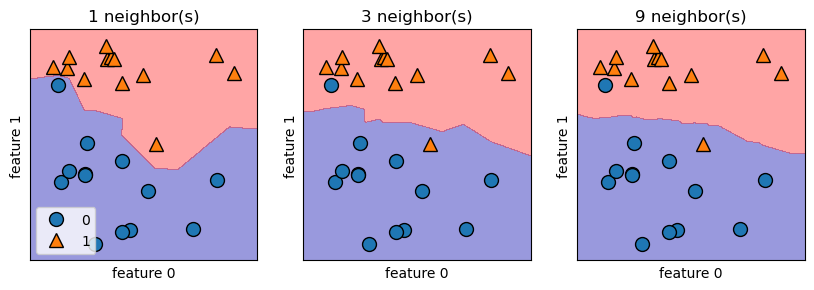

In [43]:
# decision boundary

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, 
                                  eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3);

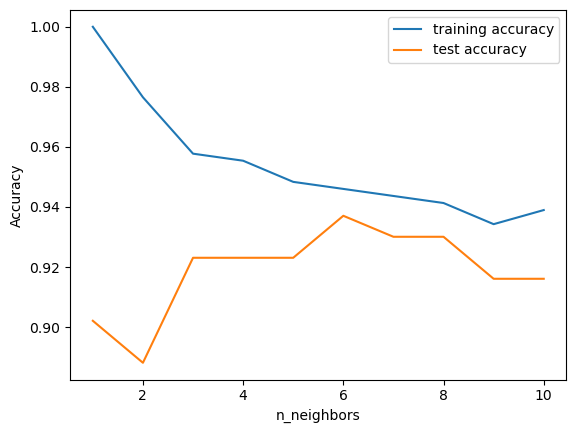

In [44]:
# breast cancer dataset

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();


### k-neighbors regression

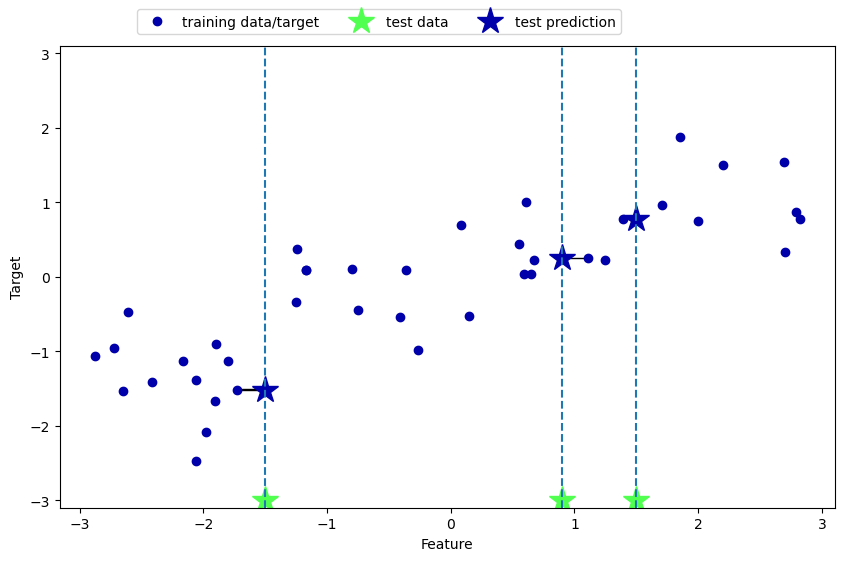

In [45]:
# wave dataset

mglearn.plots.plot_knn_regression(n_neighbors=1)

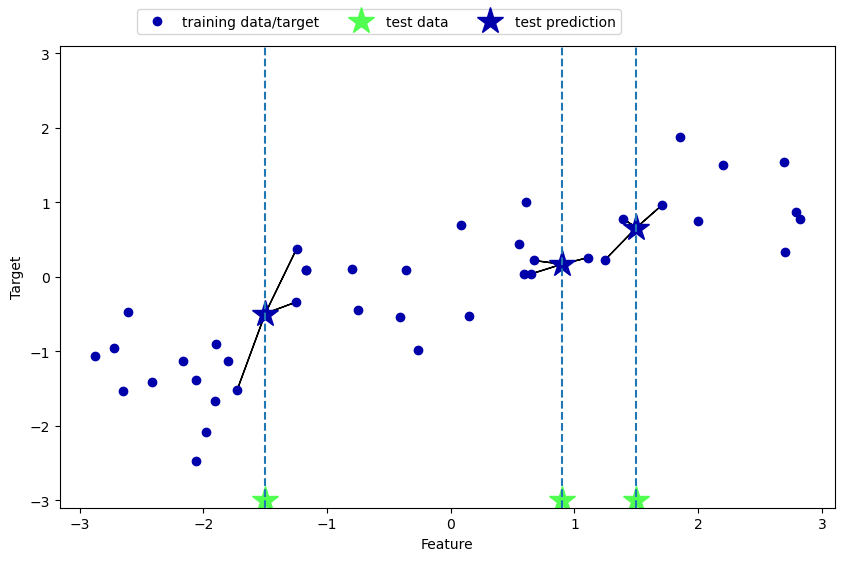

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train,y_test = train_test_split(
    X,y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
print('Test set predictions: \n{}'.format(
    reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [49]:
print('Test set R^2: {:.2f}'.format(
    reg.score(X_test, y_test)))

Test set R^2: 0.83


### Analyzing KNeighborsRegressor

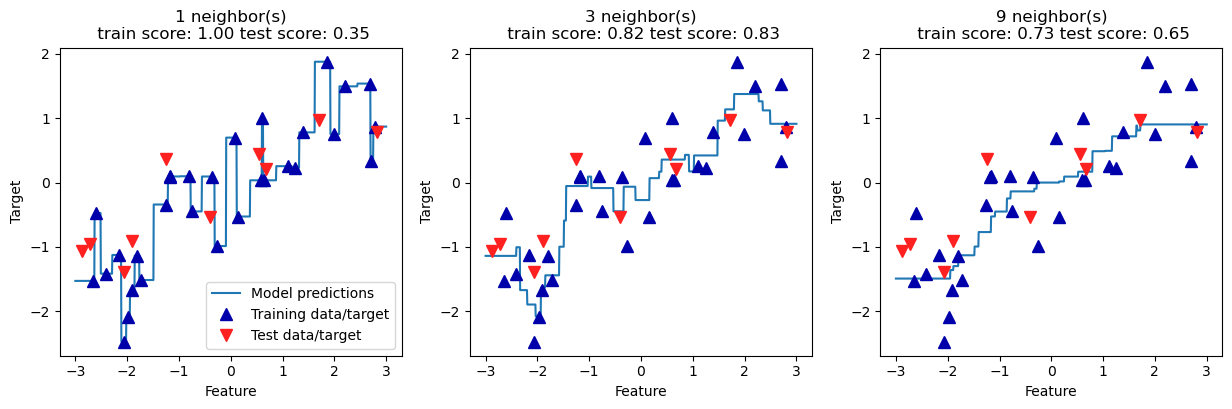

In [50]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(['Model predictions', 
                'Training data/target',
               'Test data/target'], 
               loc='best');
            

## Linear Models

### Linear models for regression

w[0]: 0.393906  b: -0.031804


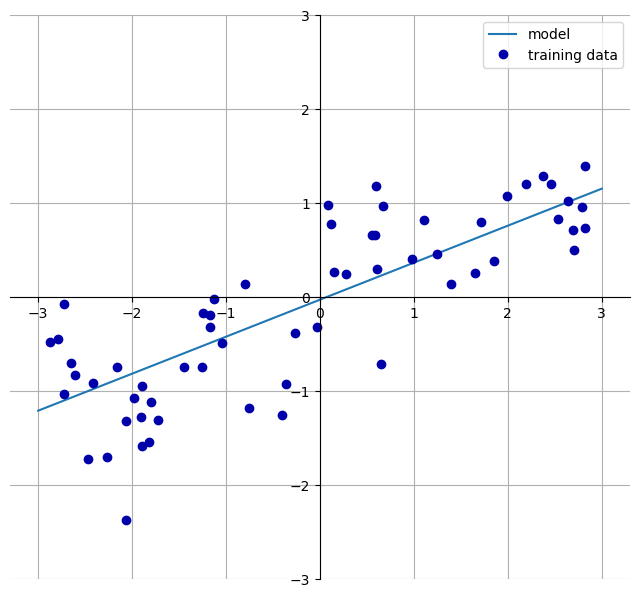

In [51]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinary least squares)

In [52]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept: -0.031804343026759704


In [53]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))


Training set score: 0.67
Test set score: 0.66


In [54]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge regression

- also linear model
- coefficients (w) chosen to fit an additional constraint

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- score is lower than for LinearRegression, but test score is higher
- expected, Ridge model more restricted, lest likely to overfit
- Ridge model makes trade-off between simplicity and peformance of trainin set (p50)

In [56]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [57]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


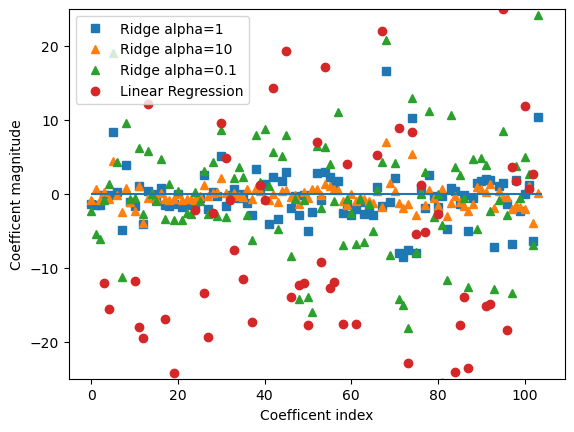

In [58]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel('Coefficent index')
plt.ylabel('Coefficent magnitude')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend();

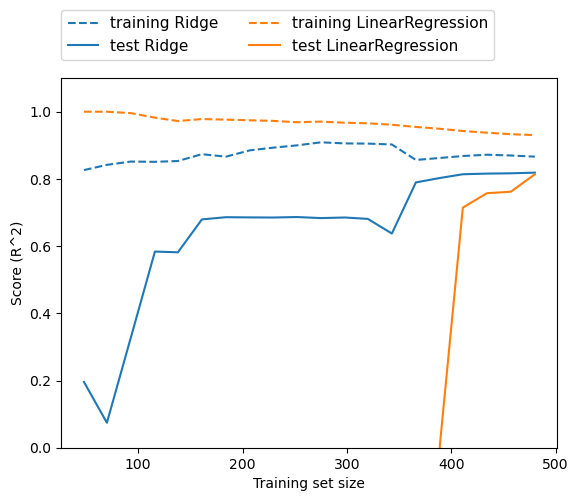

In [59]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso.coef_ !=0)))


Training set score: 0.29
Test set score: 0.21
Num features used: 4


- performs badly
- shows underfitting on train and test set

In [61]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.90
Test set score: 0.77
Num features used: 33


- lower alpha allowed to fit more complex model
- performs better on training and test data

In [62]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Num features used: {}'.format(np.sum(lasso00001.coef_ !=0)))


Training set score: 0.95
Test set score: 0.64
Num features used: 96


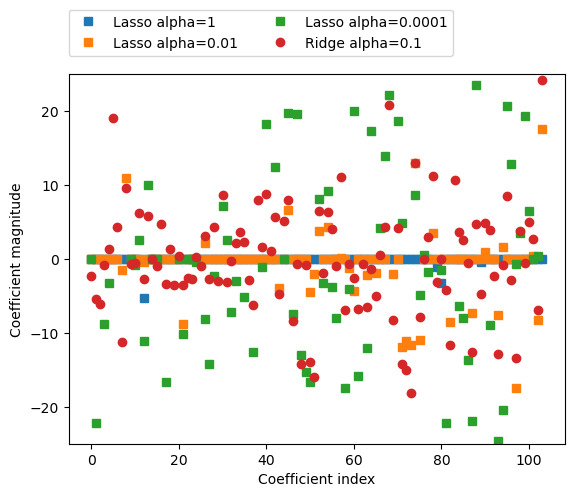

In [63]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, 's', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 's', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude');

### Linear models for classification

- Despite its name, `LogisticRegression` is a classification algorithm and not a regression algorithm, and it should not be confused with `LinearRegression`.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


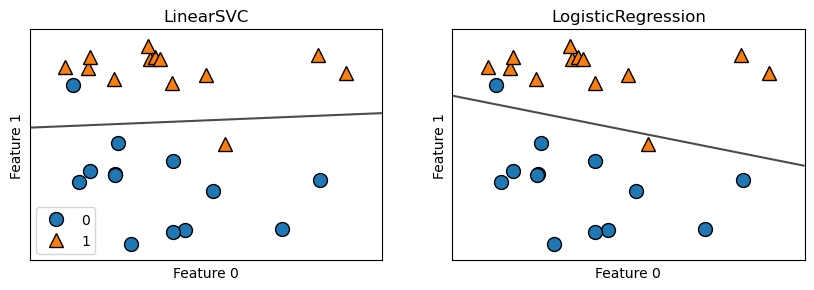

In [65]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend();

- By default, both models apply an L2 regularization, in the same way that Ridge does for regression

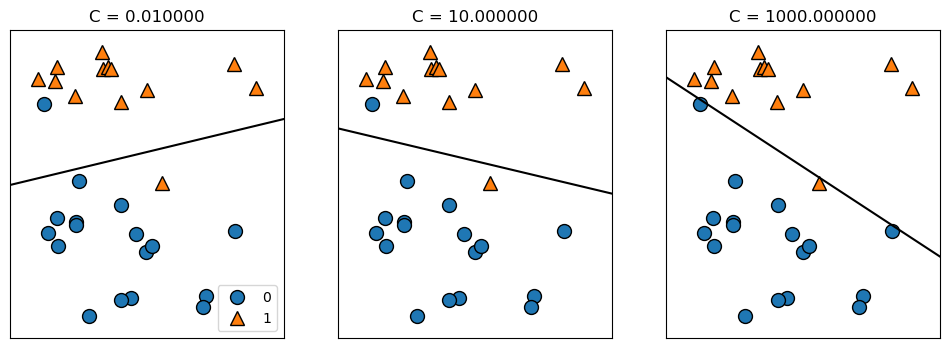

In [66]:
mglearn.plots.plot_linear_svc_regularization()

In [67]:
from sklearn.datasets import load_breast_cancer

In [75]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                   stratify=cancer.target, 
                                                   random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))


NameError: name 'load_breast_cancer' is not defined

In [69]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))


Training set score: 0.946
Test set score: 0.958


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))


Training set score: 0.934
Test set score: 0.930


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


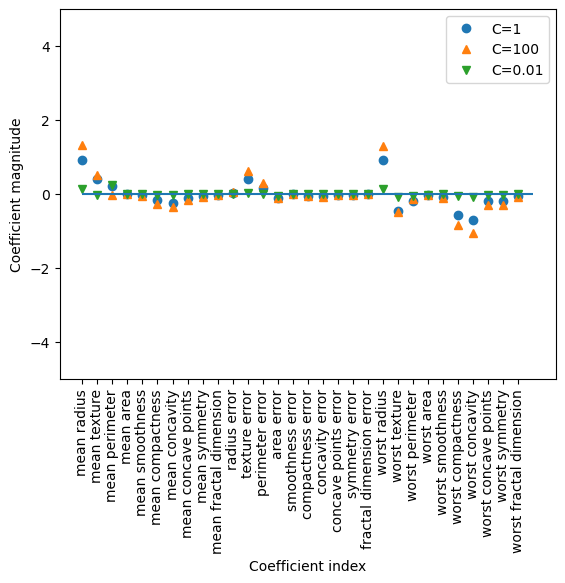

In [71]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend();


In [72]:
# for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
#     lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
#     print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
#     print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
#     plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

# plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotatation=90)
# plt.hlines(0,0, cancer.data.shape[1])
# plt.xlabel('Coefficient index')
# plt.ylabel('Coefficent magnitude')
# plt.ylim(-5,5)
# plt.legend(loc=3);


### Linear models for multiclass classification 

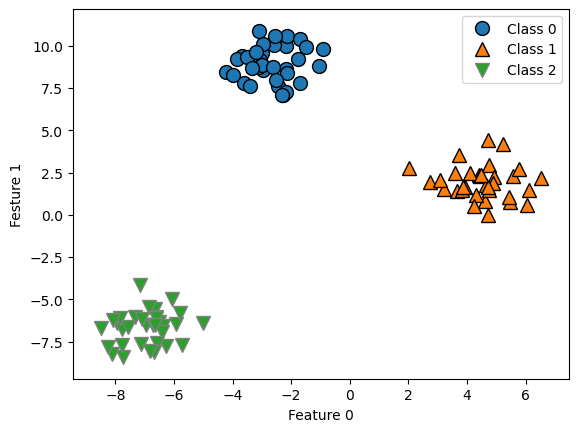

In [73]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Festure 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [74]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape: (3,)


In [75]:
# mglearn.discrete_scatter(X[:,0], X[:,1],y)
# line = np.linspace(-15,15)

# for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
#     plt.plot(line, 

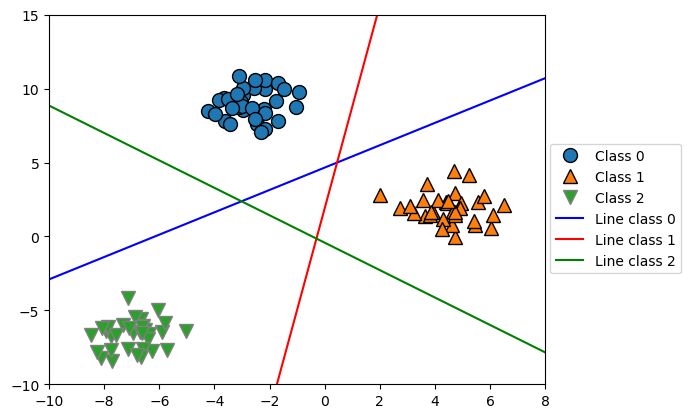

In [76]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01,0.3));


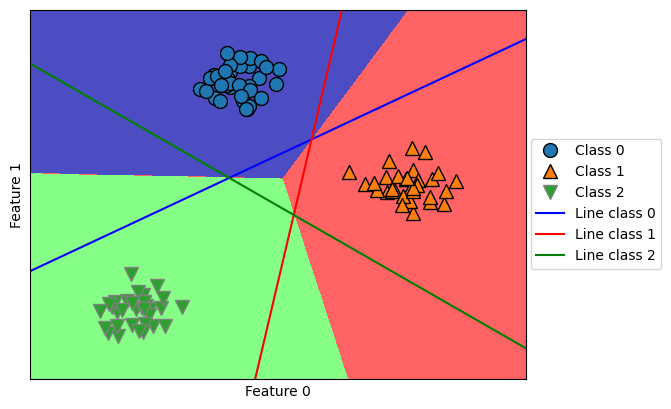

In [77]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

                                  

In [78]:
# method chaining

# logreg = LogisticRegression().fit(X_train, y_train)

# logreg = LogisticRegression()
# y_pred = logreg.fit(X_train, y_train).predict(X_test)


# instatiate model, fit, and predict on one line
# but not ideal, hard to read code, model not stored in variable can't inspect or use to predict on other data
# y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)


## Naive Bayes Classifiers

In [79]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [80]:
counts = {}

for label in np.unique(y):
    # iterate over each class
    # count (sum_ entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Trees

In [81]:
# !pip install graphviz

import graphviz

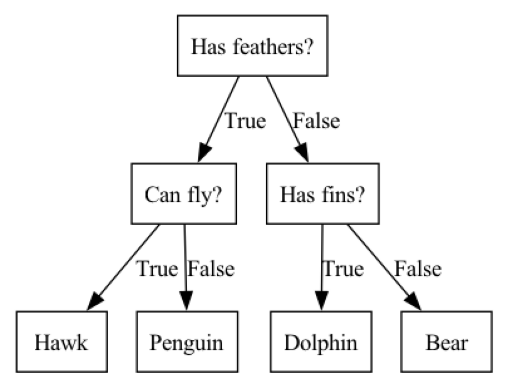

In [82]:
mglearn.plots.plot_animal_tree()

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [85]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [86]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

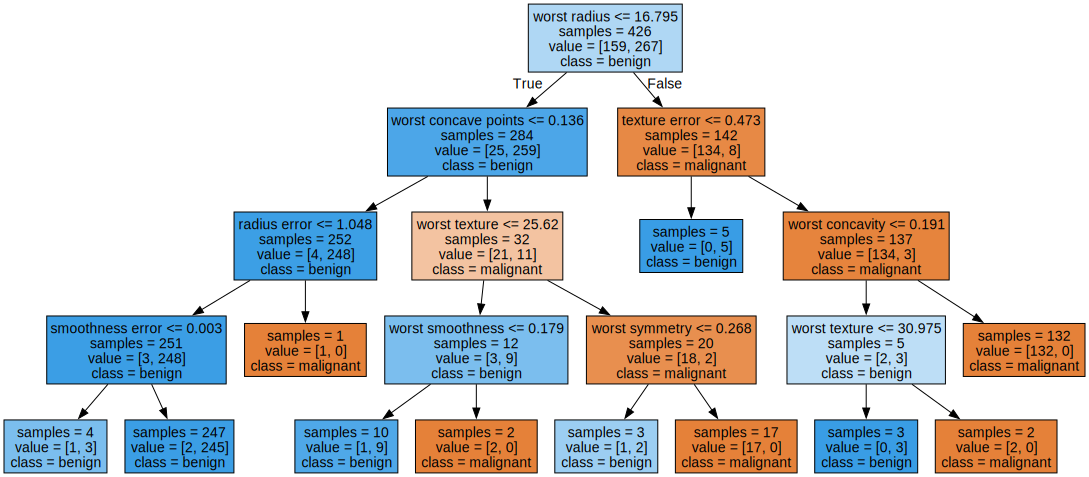

In [87]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


In [88]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


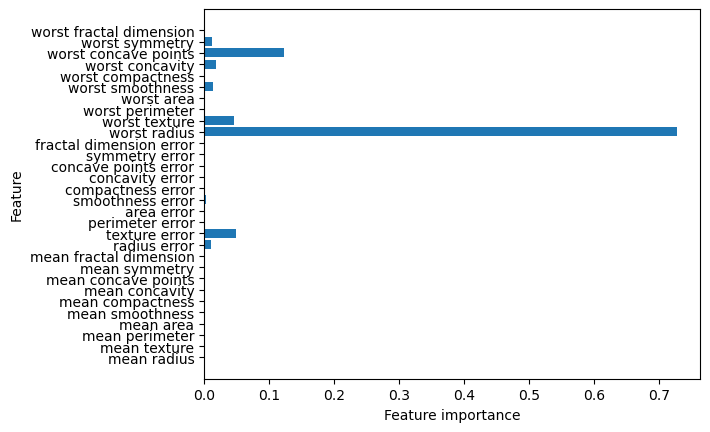

In [89]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


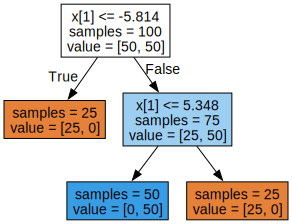

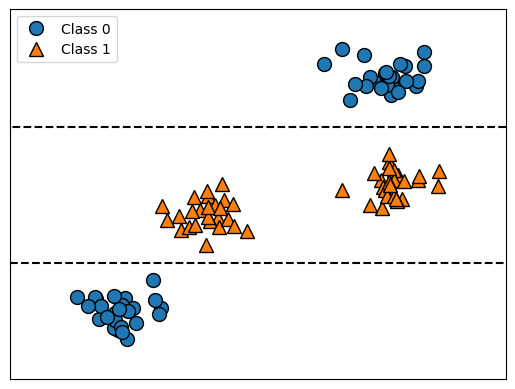

In [90]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

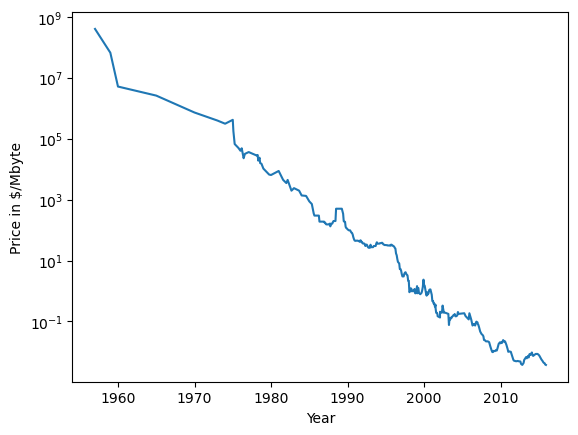

In [91]:
ram_prices = pd.read_csv('/Users/slp22/code/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte');

In [92]:
from sklearn.tree import DecisionTreeRegressor

/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/2483512513.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/2483512513.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


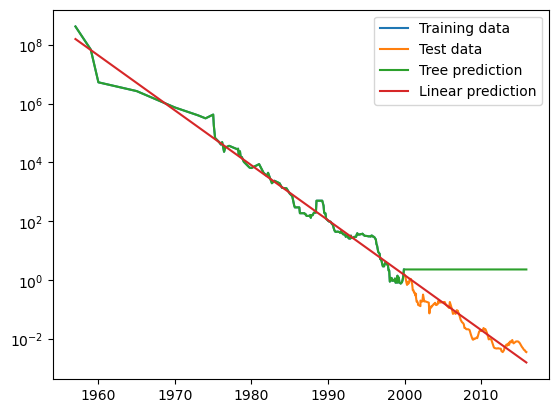

In [93]:
# use historical data to forecast prices after the year 2000

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#predict prirces based on date
X_train = data_train.date[:, np.newaxis]

# use log-trainsform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend();

In [94]:
#pre-pruning strategies, set either: max_depth, max_lead_nodes, min_samples_leaf enough to prevent overfit

## Ensembles of Decision Trees

In [95]:
# Random forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [96]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=5)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=5)

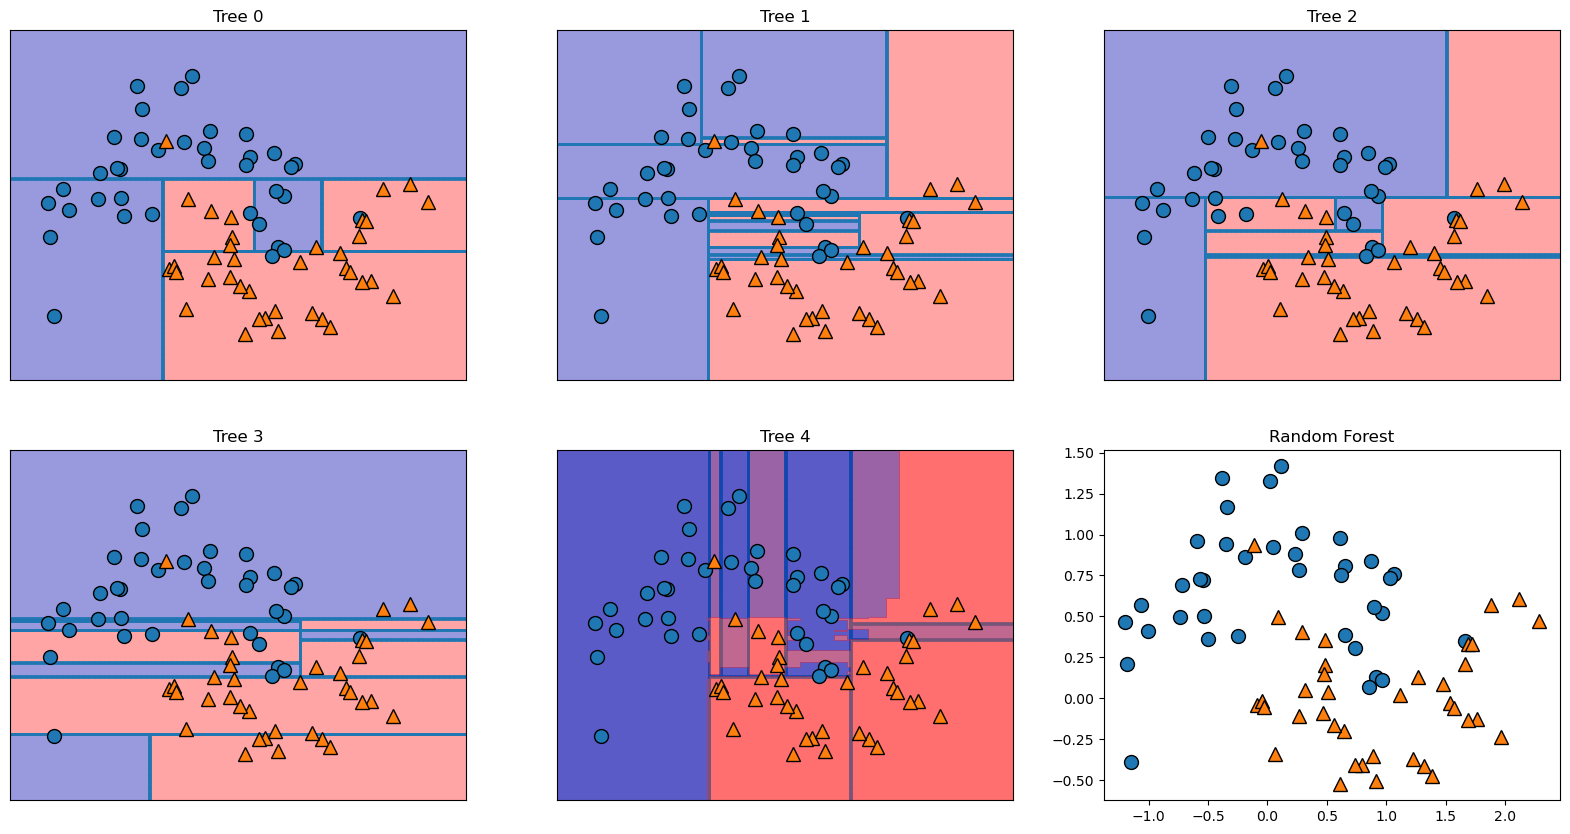

In [100]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,1], alpha=0.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train);


In [103]:
#breast cancer dataset

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.972


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [107]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accruacy on testing set: 0.965


In [108]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [109]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accruacy on testing set: 0.972


In [110]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [111]:
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accruacy on testing set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accruacy on testing set: 0.965


In [112]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

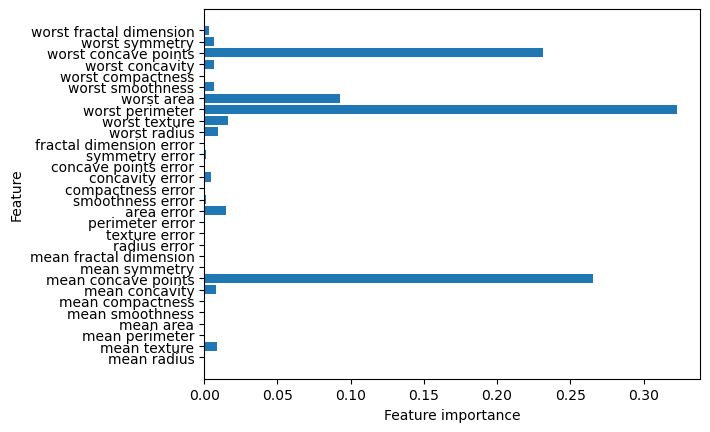

In [113]:
plot_feature_importances_cancer(gbrt)

## Kernalized Support Vector Machines

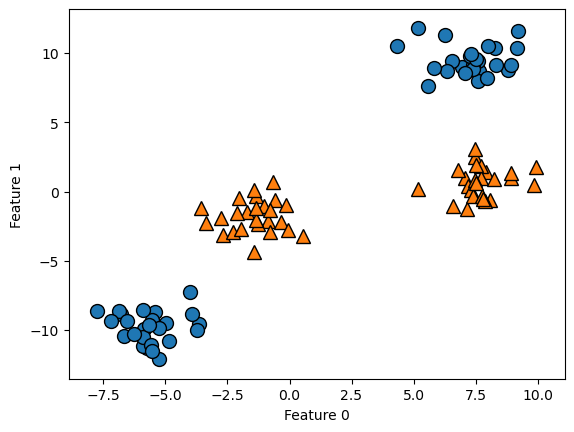

In [116]:
X,y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [117]:
from sklearn.svm import LinearSVC

In [118]:
linear_svm = LinearSVC().fit(X,y)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


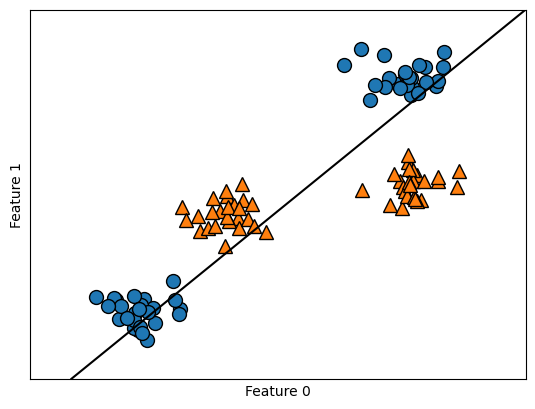

In [120]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [122]:
from mpl_toolkits.mplot3d import Axes3D, axes3d


In [130]:
# add squared first feature
X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()

#viz 3D
# ax = Axes3D(figure, elev=-152, azim=-26)
ax = Axes3D(figure, elev=-152, azim=-26)
#plot first all point with y==0, then all y==1
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2])#, c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2])#, c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [136]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] ** XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/3749972980.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60)
/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_52271/3749972980.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

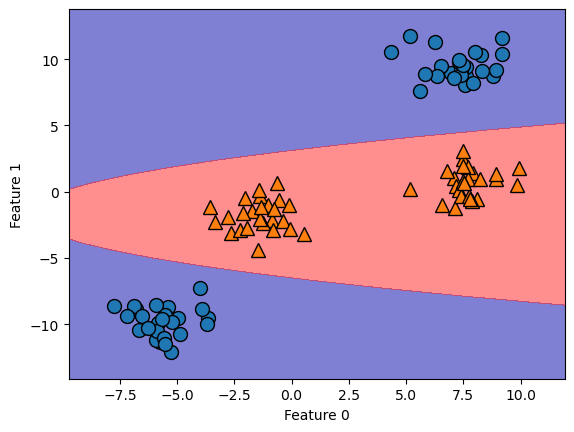

In [138]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [139]:
from sklearn.svm import SVC

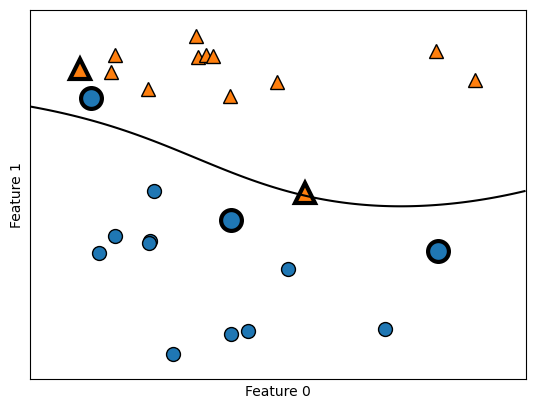

In [142]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#plot support vectors
sv = svm.support_vectors_

#class labels of support vectors give by sign of dual coef
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

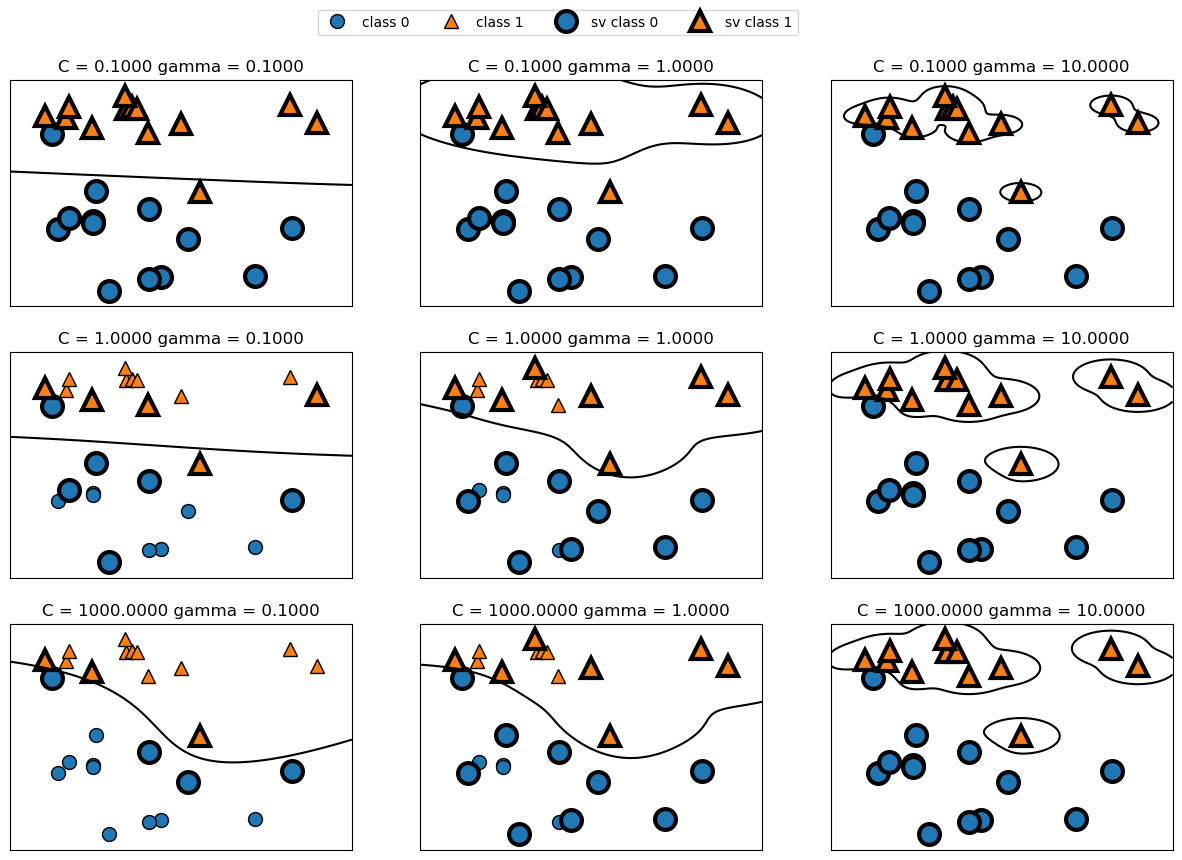

In [146]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
                 mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(0.9, 1.2));

In [153]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [154]:
print('Accuracy training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy testing set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy training set: 0.90
Accuracy testing set: 0.94


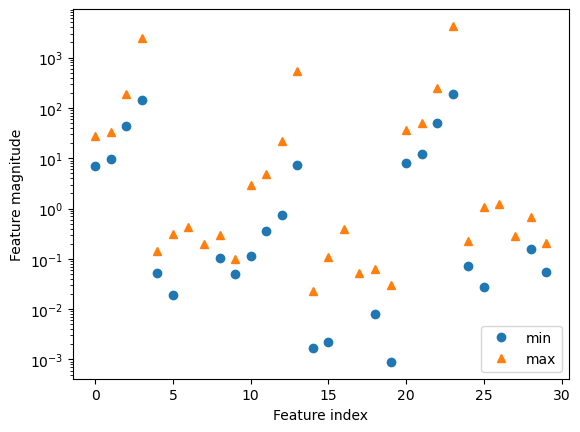

In [158]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale('log')

In [159]:
# compute min val per feature on training set
min_on_training = X_train.min(axis=0)

# compute range each feature (max-min) on training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract min and divide by range
# then, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print('Min for each feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max for each feature\n{}'.format(X_train_scaled.max(axis=0)))


Min for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [161]:
# use the same transformation on test set, use min and range of training set
X_test_scaled = (X_test - min_on_training) / range_on_training

In [162]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [163]:
print('Accuracy on training set:{:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on testing set:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.984
Accuracy on testing set:0.972


In [164]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)

SVC(C=100)

In [165]:
print('Accuracy on training set:{:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on testing set:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:1.000
Accuracy on testing set:0.965


## Neural Networks (Deep Learning) p104

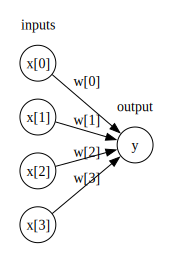

In [166]:
display(mglearn.plots.plot_logistic_regression_graph())

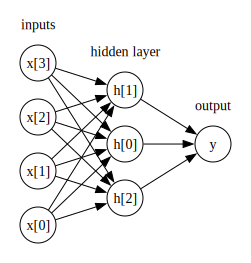

In [167]:
display(mglearn.plots.plot_single_hidden_layer_graph())

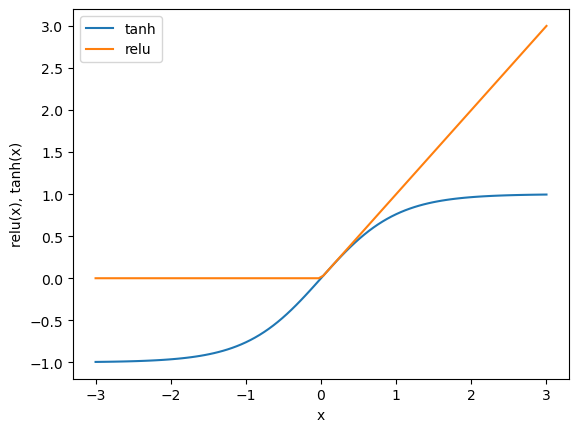

In [169]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)');

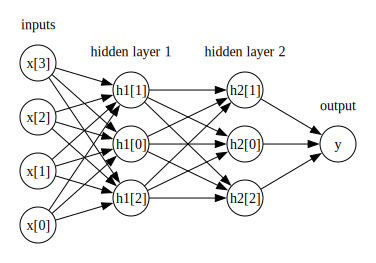

In [170]:
mglearn.plots.plot_two_hidden_layer_graph()

In [171]:
# tuning neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [185]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

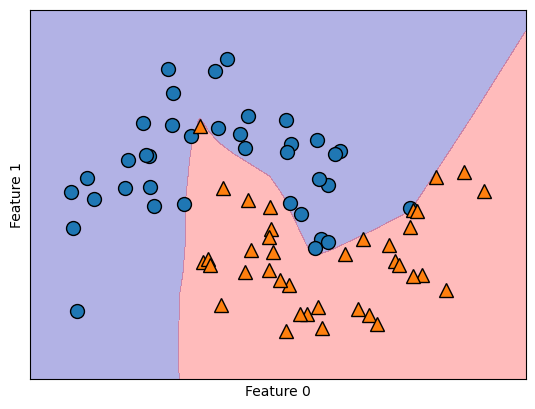

In [186]:
mlp = MLPClassifier(solver ='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


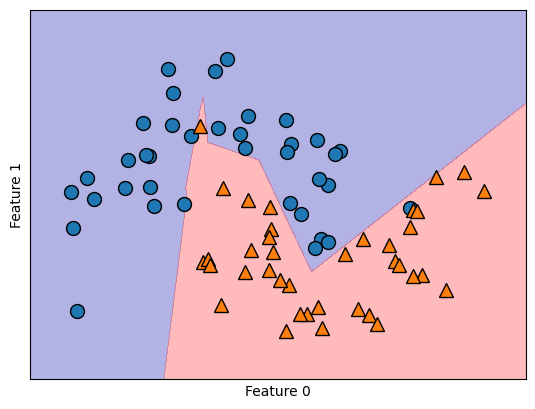

In [188]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

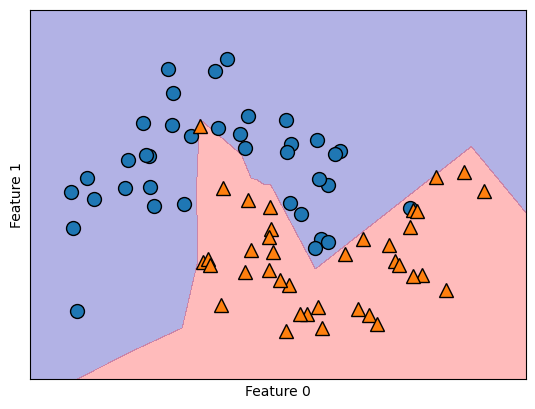

In [190]:
# using 2 hidden layers with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


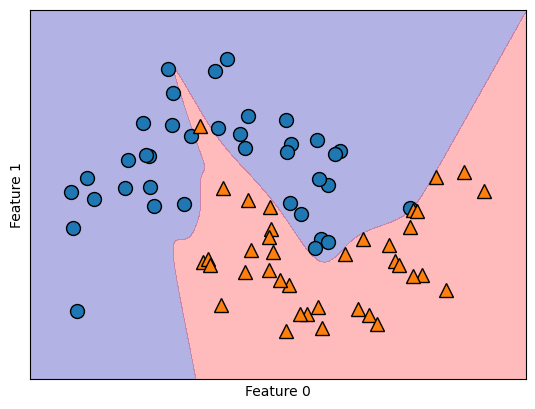

In [191]:
# using 2 hidden layers with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


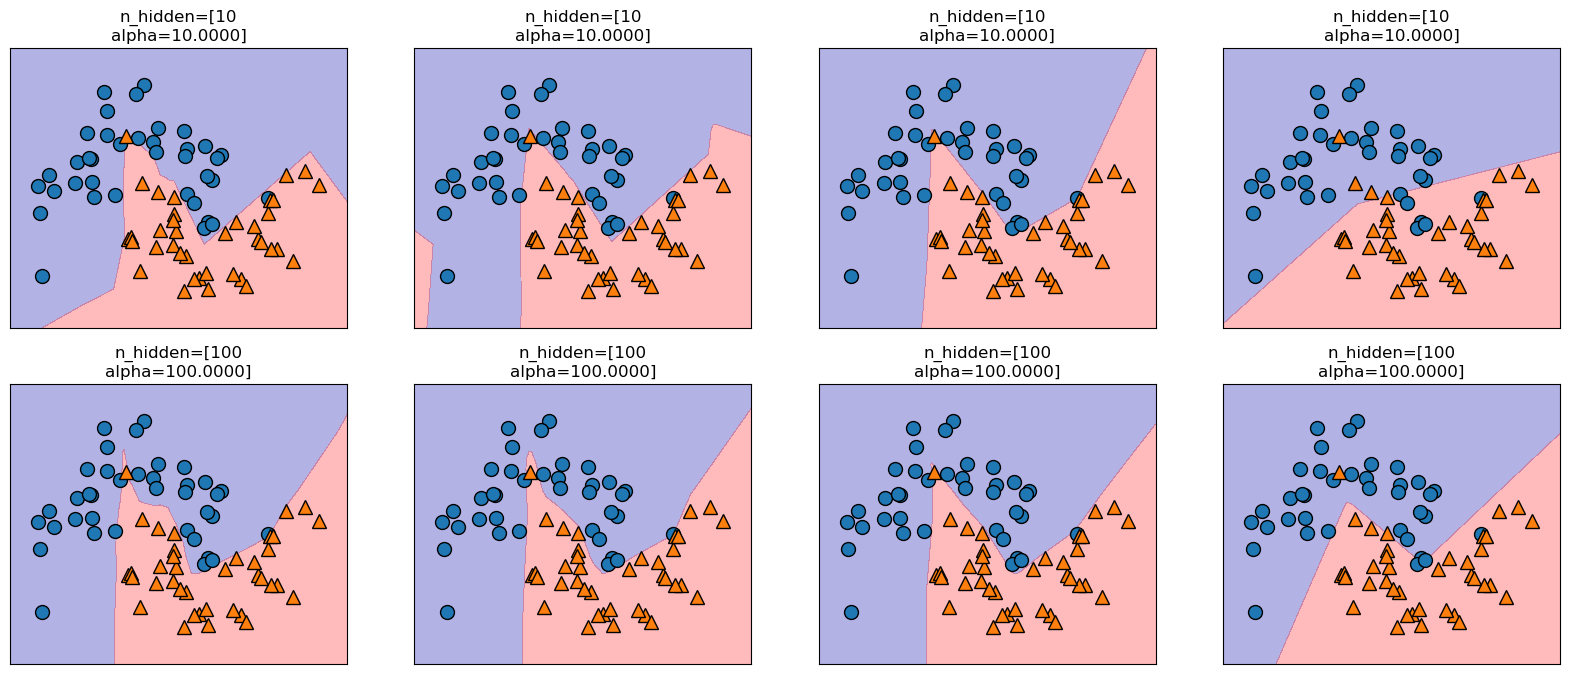

In [193]:
fig, axes = plt.subplots(2,4, figsize=(20,8))

for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}\nalpha={:.4f}]'.format(n_hidden_nodes, n_hidden_nodes, alpha));

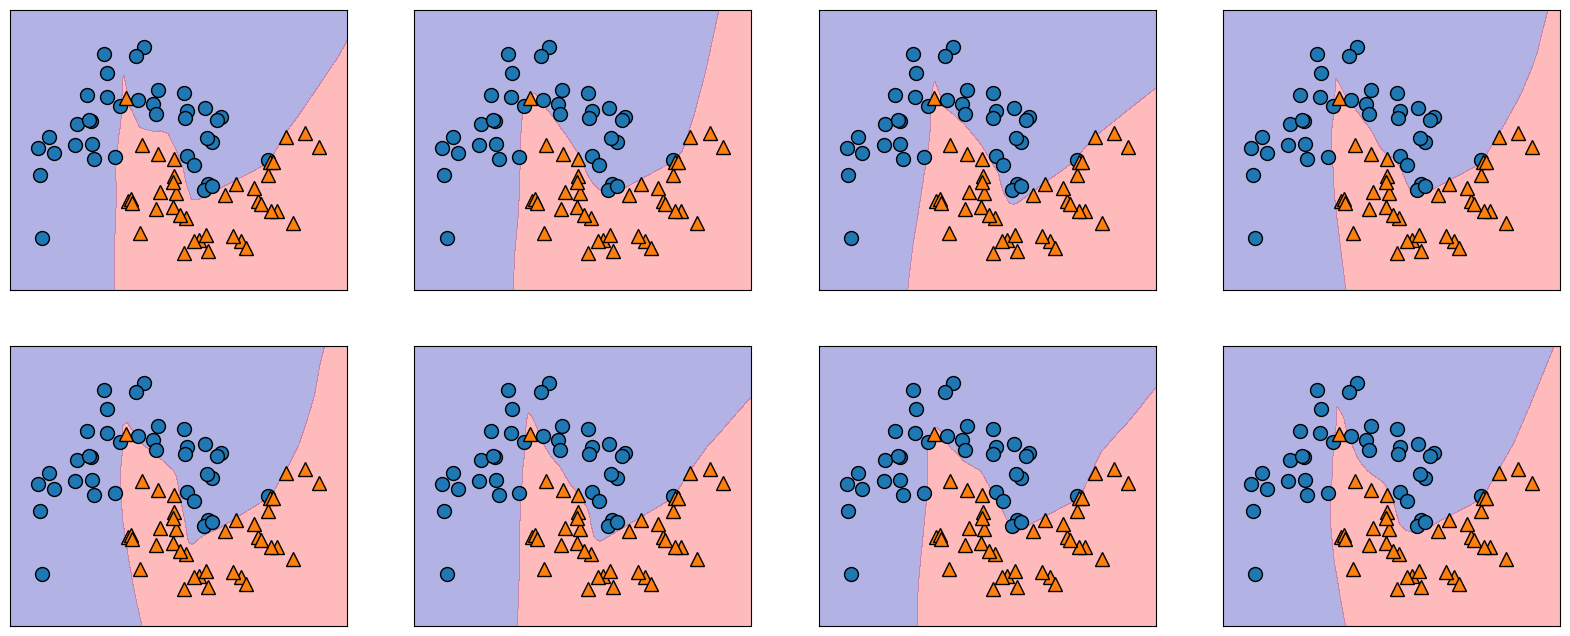

In [194]:
fig, axes = plt.subplots(2,4, figsize=(20,8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax);

In [199]:
print('Cancer data per-feature maxima:\n{}'.format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [200]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [201]:
print('Accuracy training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy testing set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy training set: 0.94
Accuracy testing set: 0.92


In [204]:
# compute mean value per feature on train set
mean_on_train = X_train.mean(axis=0)

# compute std dev each feature on train set
std_on_train = X_train.std(axis=0)

# compute mean and scale inverset standard deviation, afterward mean=0, std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use same transformation (using training mean and std) on test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [205]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [206]:
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [207]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [208]:
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [209]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [210]:
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


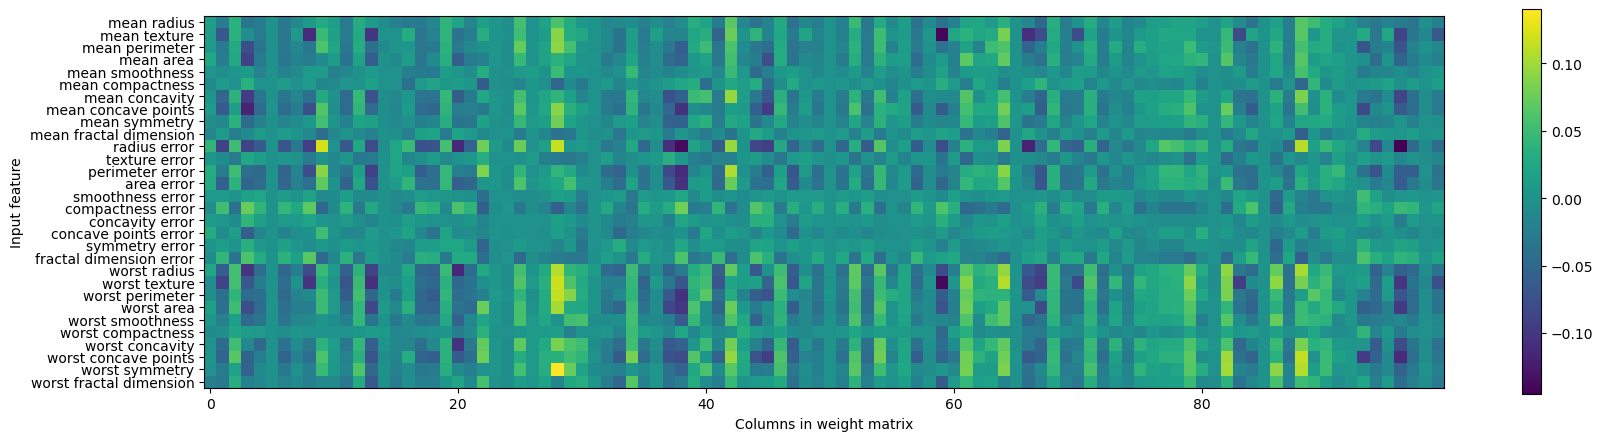

In [212]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar();

# Uncertainty Estimates from Classifiers

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split


In [7]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
    X, y_named, y, random_state=0)

In [8]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## Decision Function

In [9]:
print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [16]:
print('Decision function:{}'.format(
    gbrt.decision_function(X_test)[:6]))

Decision function:[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [27]:
print('Threshold decision funcion:\n{}'.format(
    gbrt.decision_function(X_test)>0))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Threshold decision funcion:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [25]:
#make bool T/F into 1 and 1
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)

#use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

#pred is same as output of gbrt.predict
print('pred is equal to predictions: {}'.format(
    np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions: True


In [26]:
decision_function= gbrt.decision_function(X_test)
print('Decision function min: {:.2f} max: {:.2f}'.format(np.min(decision_function), 
                                                         np.max(decision_function)))

Decision function min: -7.69 max: 4.29


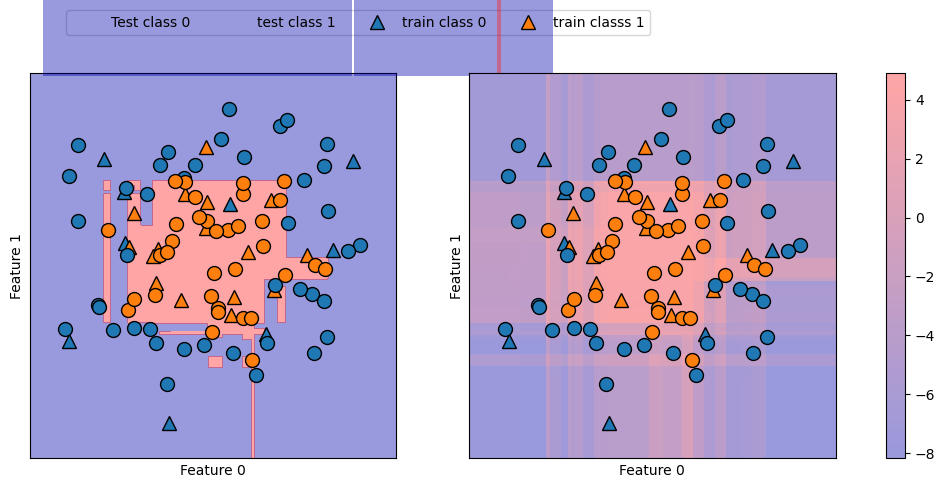

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1],alpha=0.4, cm=mglearn.ReBl)

for ax in axes:
    #plot train and test
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, 
                            markers='o', ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar= plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'test class 1', 'train class 0',
               'train classs 1'], ncol=4, loc=(0.1, 1.1));

## Predicting Probabilities

In [56]:
print('Shape of probabilities:{}'.format(
    gbrt.predict_proba(X_test).shape))

Shape of probabilities:(25, 2)


In [57]:
print('Predicted probabilities:\n{}'.format(
    gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


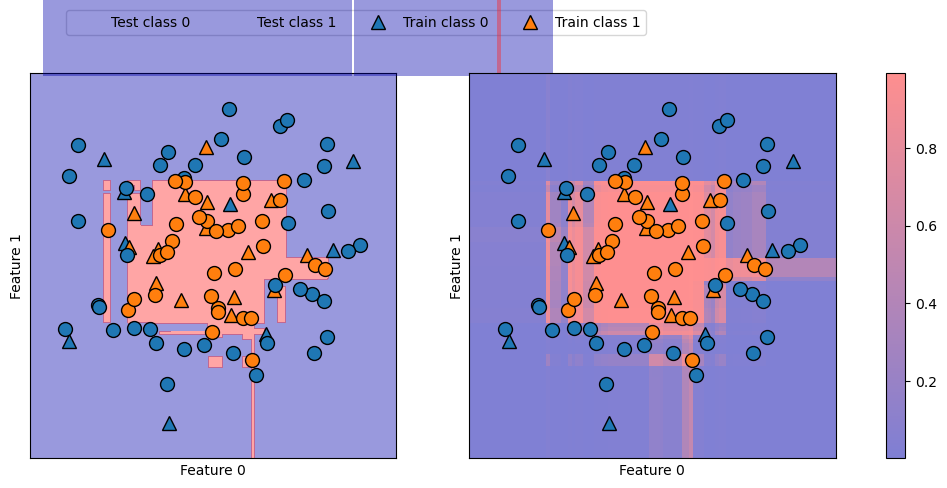

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
# plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                     "Train class 1"], ncol=4, loc=(.1, 1.1));

## Uncertainty in Multiclass Classification

In [62]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [65]:
print('Decision function shape:{}'.format(
    gbrt.decision_function(X_test).shape))
print('Decision function:\n{}'.format(
    gbrt.decision_function(X_test[:6,:])))

Decision function shape:(38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [66]:
print('Argmax of decision function:\n{}'.format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [70]:
print('Predicted probabilities:\n{}'.format(
    gbrt.predict_proba(X_test)[:6]))
print('Sums: {}'.format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [71]:
print("Argmax of predicted probabilities:\n{}".format( np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [77]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print('unique class in train:{}'.format(logreg.classes_))
print('predictions:{}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('argmax decision function:{}'.format(argmax_dec_func[:10]))
print('argmax combined with classes:{}'.format(
    logreg.classes_[argmax_dec_func][:10]))

unique class in train:['setosa' 'versicolor' 'virginica']
predictions:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax decision function:[1 0 2 1 1 0 1 2 1 1]
argmax combined with classes:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3. Unsupervised Learning and Preprocessing

## Preprocessing & Scaling

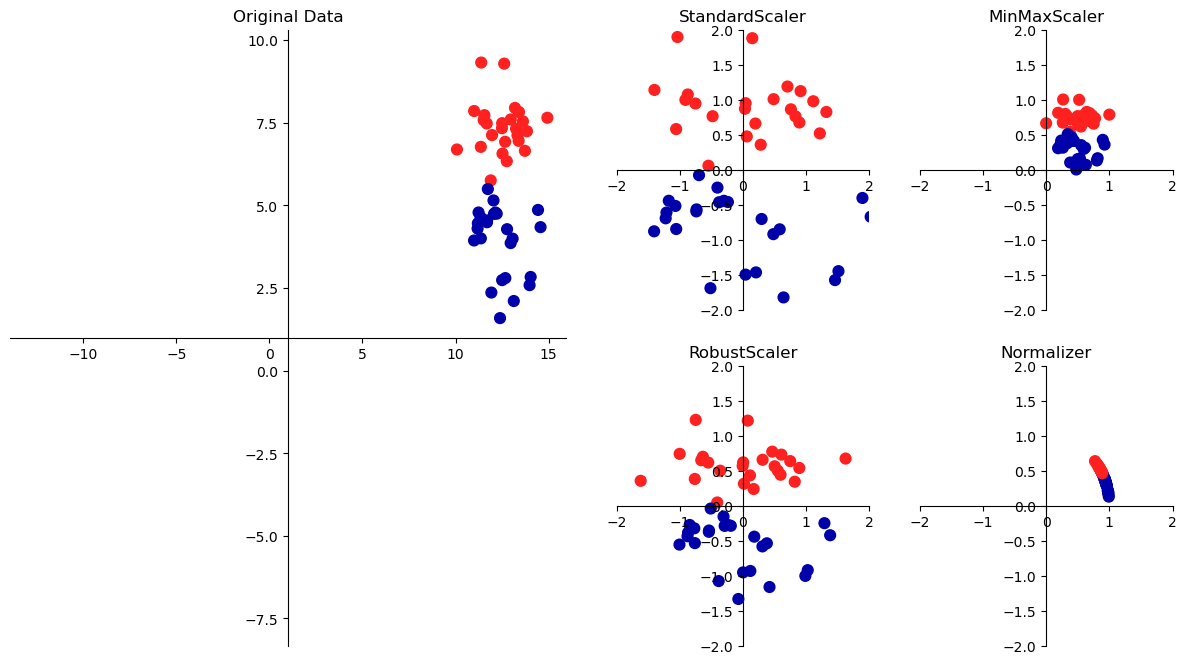

In [78]:
mglearn.plots.plot_scaling()

### Applying Data Transformation

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [18]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test= train_test_split(
    cancer.data,cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [86]:
X_train_scaled = scaler.transform(X_train)

print('transformed shape:{}'.format(X_train_scaled.shape))
print('per-feature min before scaling:\n{}'.format(X_train.min(axis=0)))
print('per-feature max before scaling:\n{}'.format(X_train.max(axis=0)))
print('per-feature min after scaling:\n{}'.format(X_train_scaled.min(axis=0)))
print('per-feature max after scaling:\n{}'.format(X_train_scaled.max(axis=0)))


transformed shape:(426, 30)
per-feature min before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature max before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature min after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature max after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [87]:
X_test_scaled = scaler.transform(X_test)
print('per-feature min after scaling:\n{}'.format(X_train_scaled.min(axis=0)))
print('per-feature max after scaling:\n{}'.format(X_train_scaled.max(axis=0)))


per-feature min after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature max after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


### Scaling Training and Test Data the Same Way

In [88]:
from sklearn.datasets import make_blobs

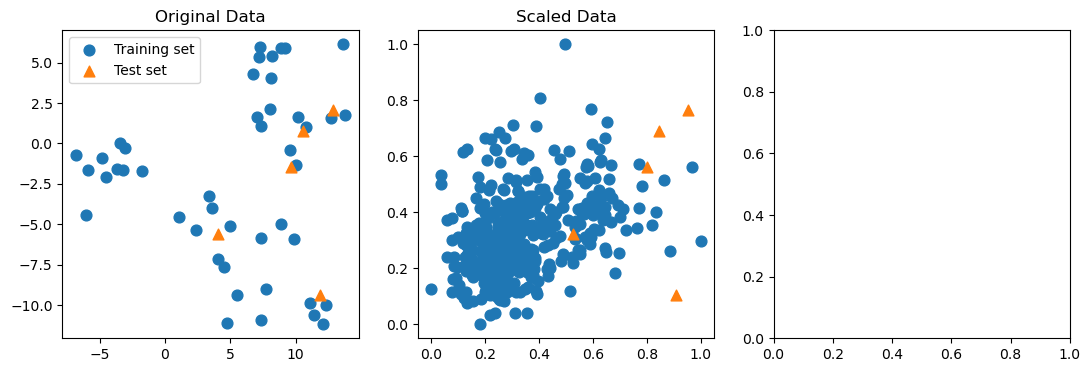

In [100]:
X,_ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

X_train,X_test = train_test_split(X, random_state=5, test_size=0.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], 
                label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

#scale data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                label="Test set", s=60)
axes[1].set_title("Scaled Data");

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
#X_scaled = scaler.fit(X).transform(X)

#same, but efficient
X_scaled_d = scaler.fit_transform(X)

### The Effect of Preprocessing on Supervised Learning

In [103]:
from sklearn.svm import SVC

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [109]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('Scaled test set accuracy:{:.2f}'.format(svm.score(X_test_scaled,
                                                        y_test)))

Scaled test set accuracy:0.97


In [110]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('SVM test accuracy: {:.2f}'.format(
    svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Dimensionality Reduction, Feature Extraction, and Manifold Learning p140

### Principal Component Analysis

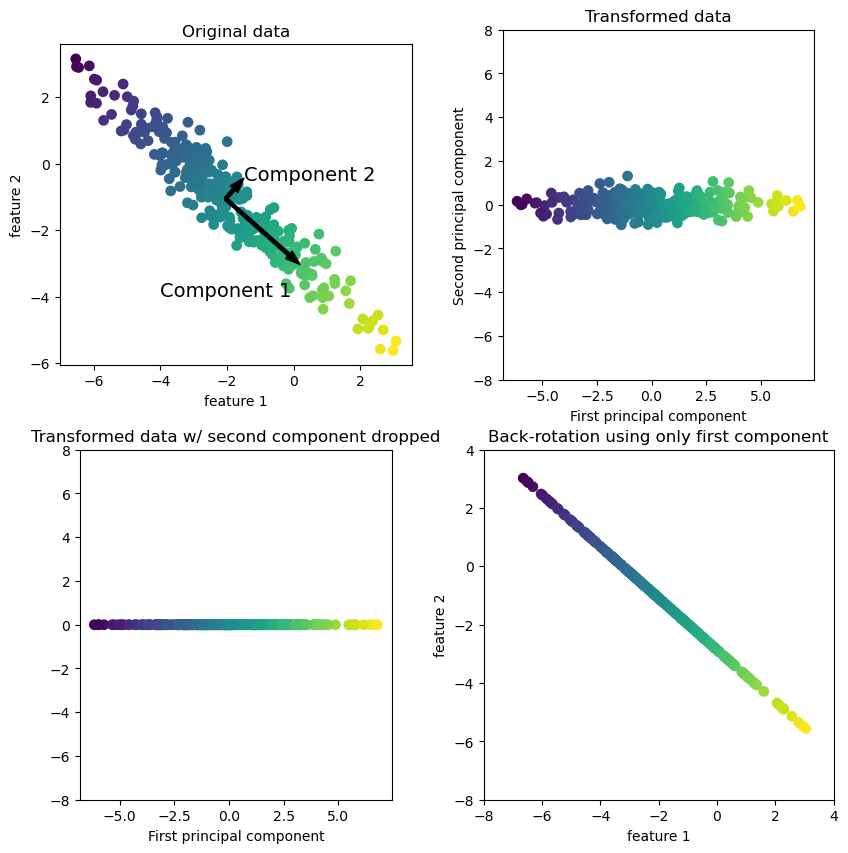

In [2]:
mglearn.plots.plot_pca_illustration()

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

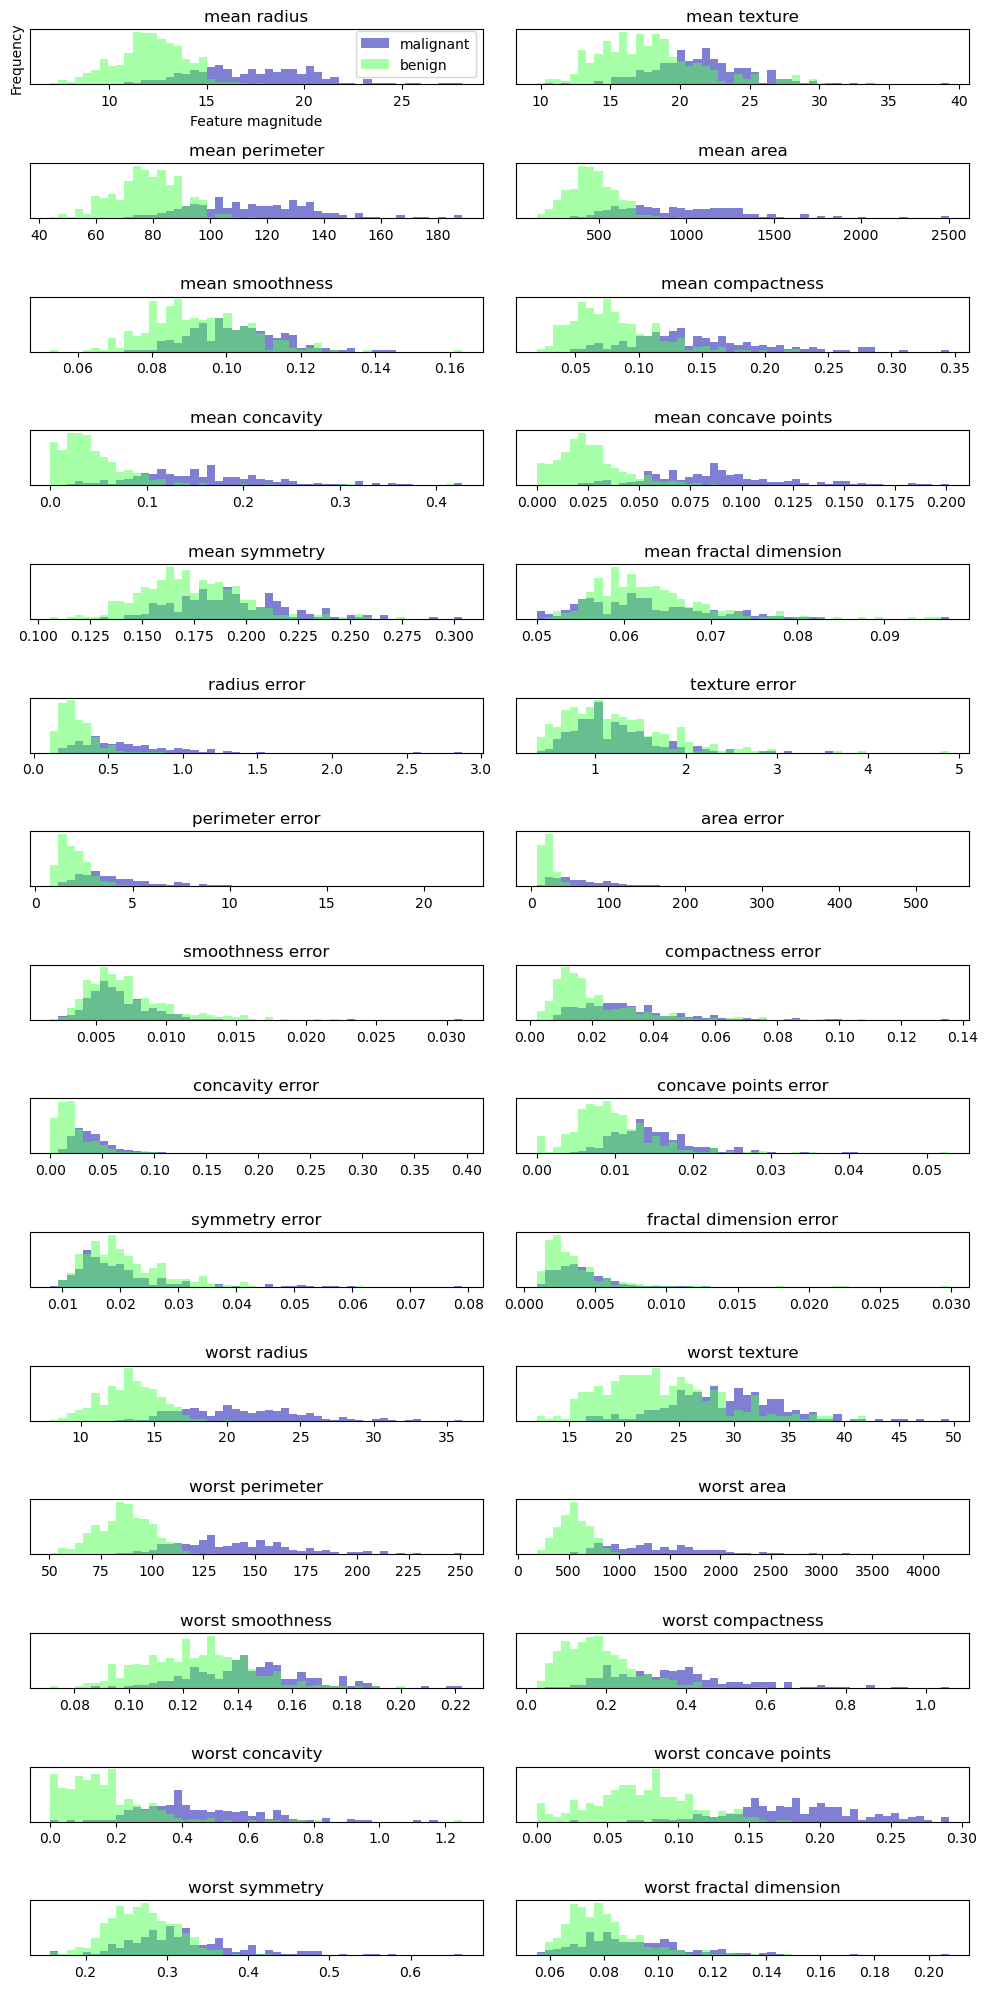

In [19]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
    
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [23]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2) #keep first two principal components
pca.fit(X_scaled)

PCA(n_components=2)

In [27]:
X_pca = pca.transform(X_scaled)
print('Original shape:{}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

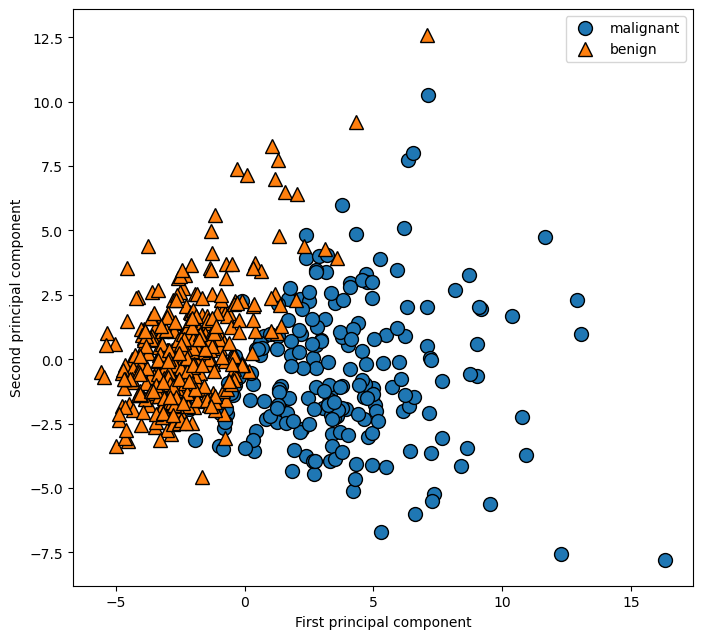

In [28]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [29]:
print('PCA component shape: {}'.format(pca.components_.shape))
print('PCA components:\n{}'.format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


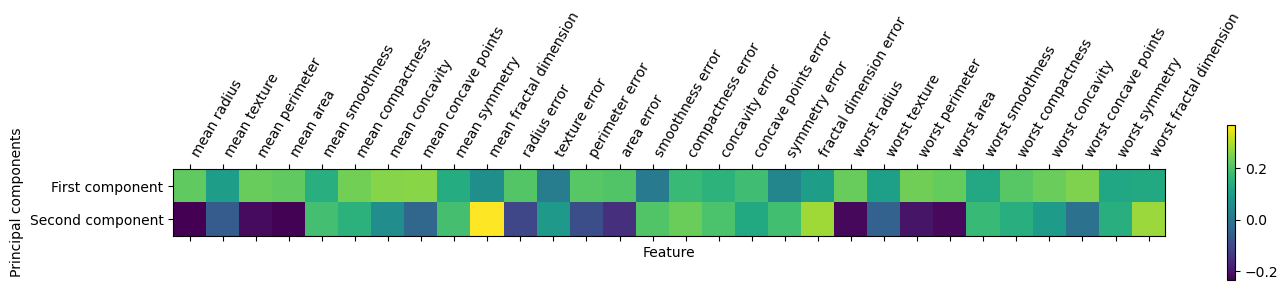

In [32]:
#heatmap of first 2 principal components

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components');

In [43]:
#eigenfaces for feature extraction
from sklearn.datasets import fetch_lfw_people

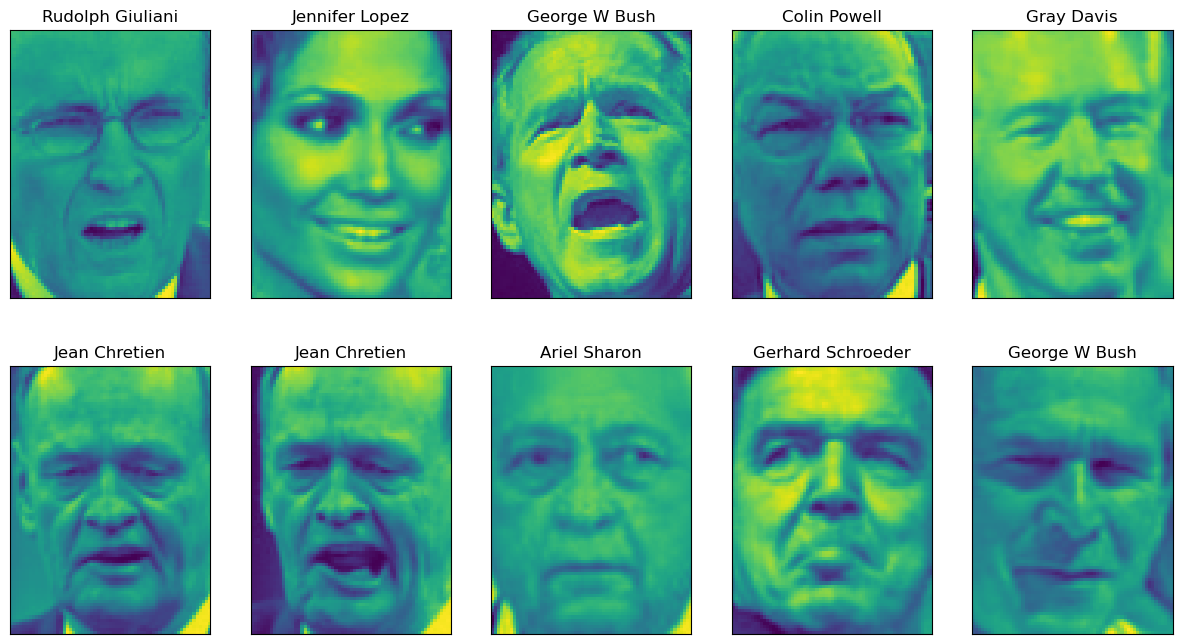

In [44]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
                                    


In [45]:
print('people.image.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people.target_names)))

people.image.shape: (2559, 87, 65)
Number of classes: 46


In [46]:
counts = np.bincount(people.target)

for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name,count), end='  ')
    if (i + 1) % 3 ==0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Ariel Sharon               77  Atal Bihari Vajpayee       24  
Bill Clinton               29  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Hamid Karzai               22  Hans Blix                  39  Hugo Chavez                71  
Igor Ivanov                20  Jack Straw                 28  Jacques Chirac             52  
Jean Chretien              55  Jennifer Aniston           21  Jennifer Capriati          42  
Jennifer Lopez             21  John Ashcroft              53  Juan Carlos Ferrero        28  
Junichiro Koizumi          60  Kofi Annan                 32  Laura Bush                 41  
Lindsay Davenport          22  Lleyton Hewitt             41

In [47]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
X_train, X_test,y_train,y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test,y_test)))

Test set score of 1-nn: 0.26


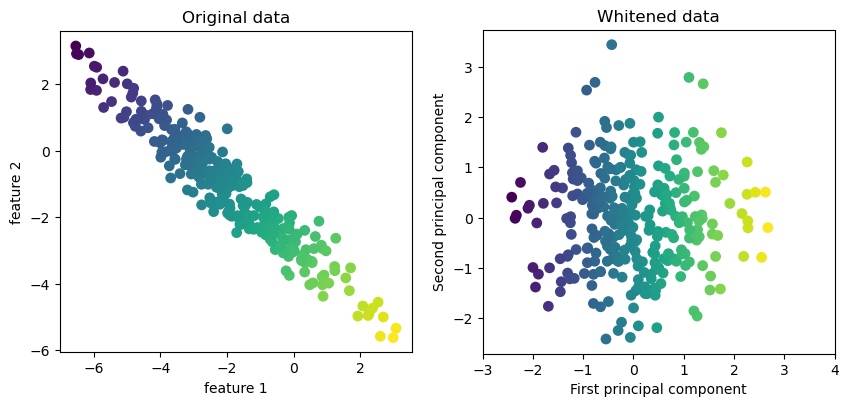

In [57]:
#transform data with PCA with whitening
mglearn.plots.plot_pca_whitening()

In [62]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print('X_train_pca.shape:{}'.format(X_train_pca.shape))

X_train_pca.shape:(1199, 100)


In [64]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('Test set accuracy: {:.2f}'.format(knn.score(X_test_pca, y_test)))
print('pca.components_.shape: {}'.format(pca.components_.shape))

Test set accuracy: 0.35
pca.components_.shape: (100, 5655)


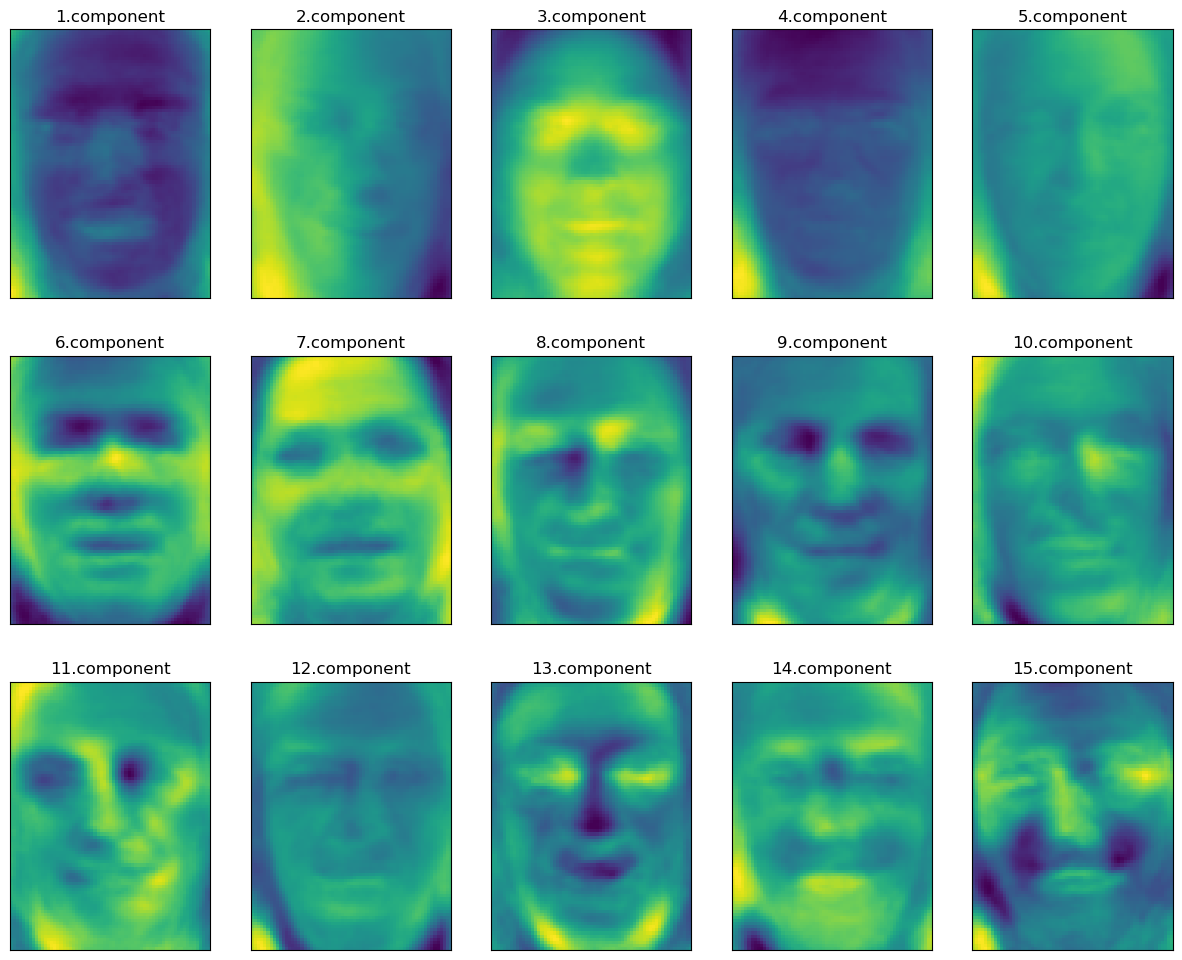

In [66]:
fix, axes = plt.subplots(3,5, figsize=(15,12),
                         subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title('{}.component'.format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.001661, ..., 0.002353],
       ...,
       [0.001297, ..., 0.001615]], dtype=float32), 
array([[0.000451, ..., 0.001989],
       ...,
       [0.0006  , ..., 0.000251]], dtype=float32))
________________________________________________________pca_faces - 1.6s, 0.0min


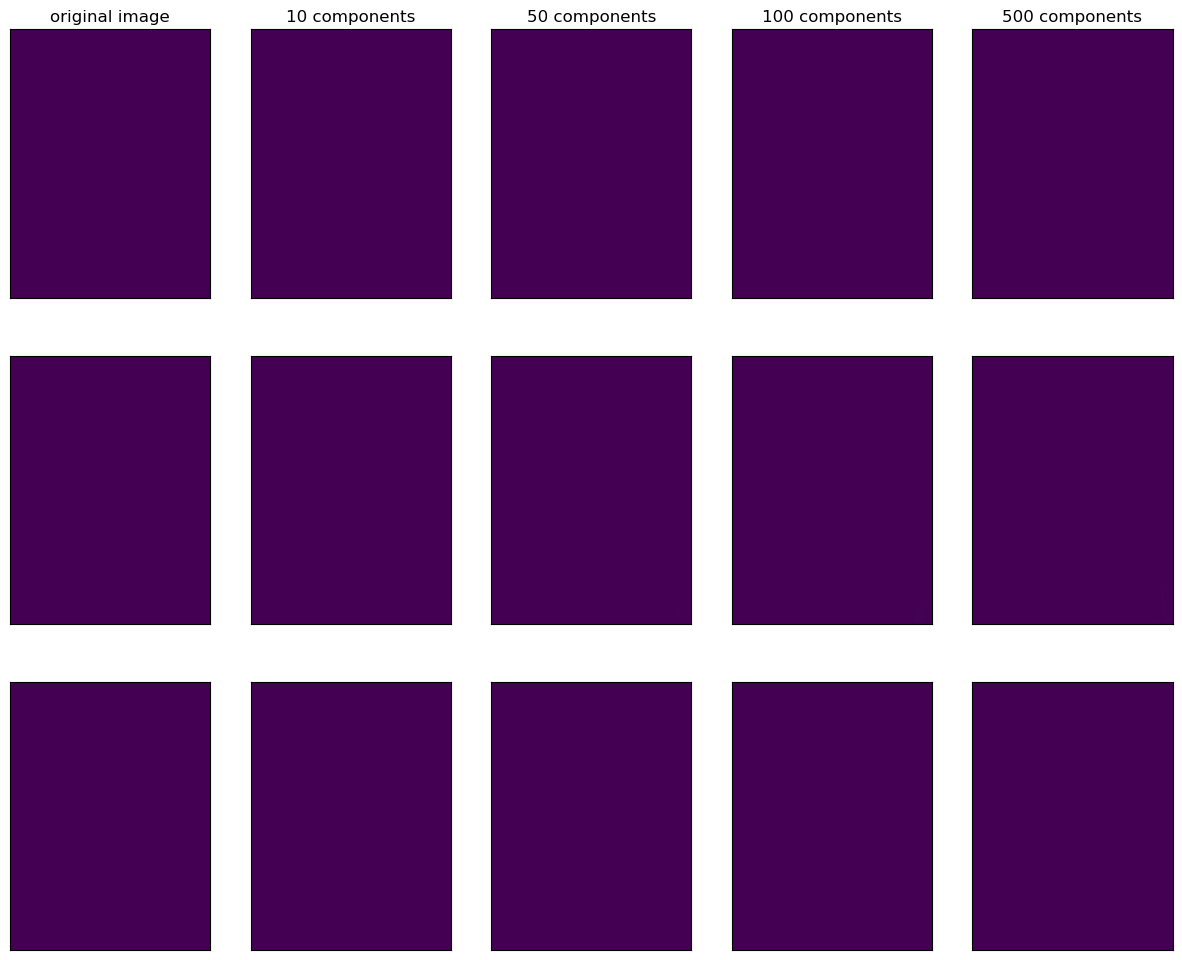

In [67]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

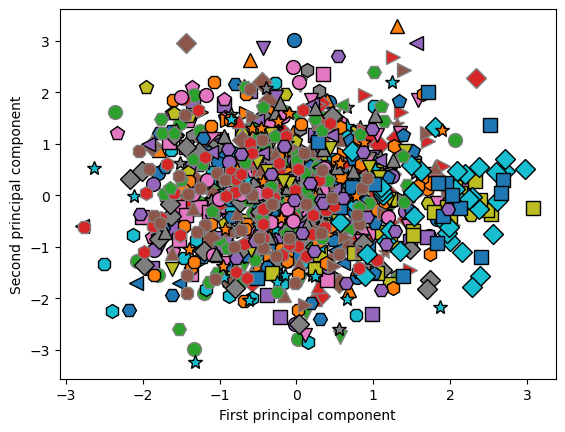

In [70]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1],y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

### Non-Negative Matrix Factorization

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


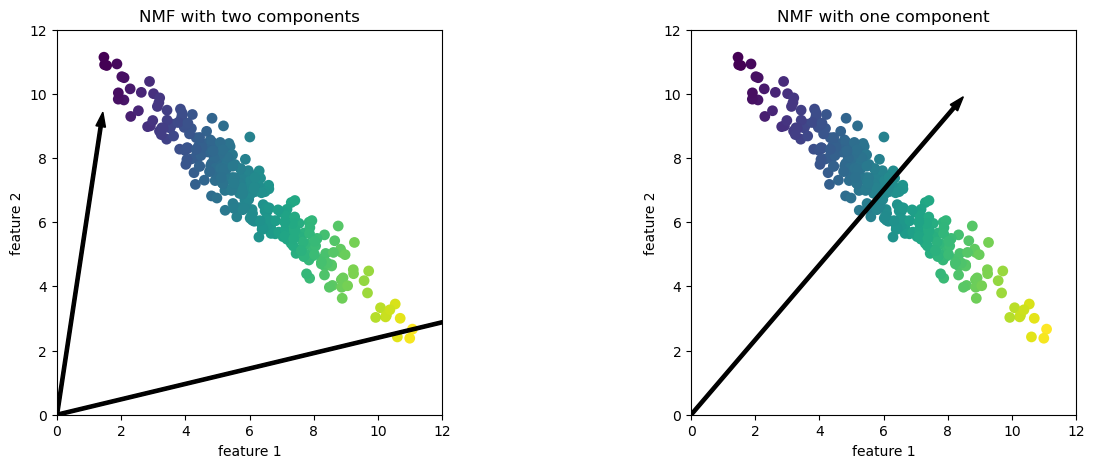

In [71]:
mglearn.plots.plot_nmf_illustration()

In [72]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.001661, ..., 0.002353],
       ...,
       [0.001297, ..., 0.001615]], dtype=float32), 
array([[0.000451, ..., 0.001989],
       ...,
       [0.0006  , ..., 0.000251]], dtype=float32))


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


KeyboardInterrupt: 

In [73]:
from sklearn.decomposition import NMF

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


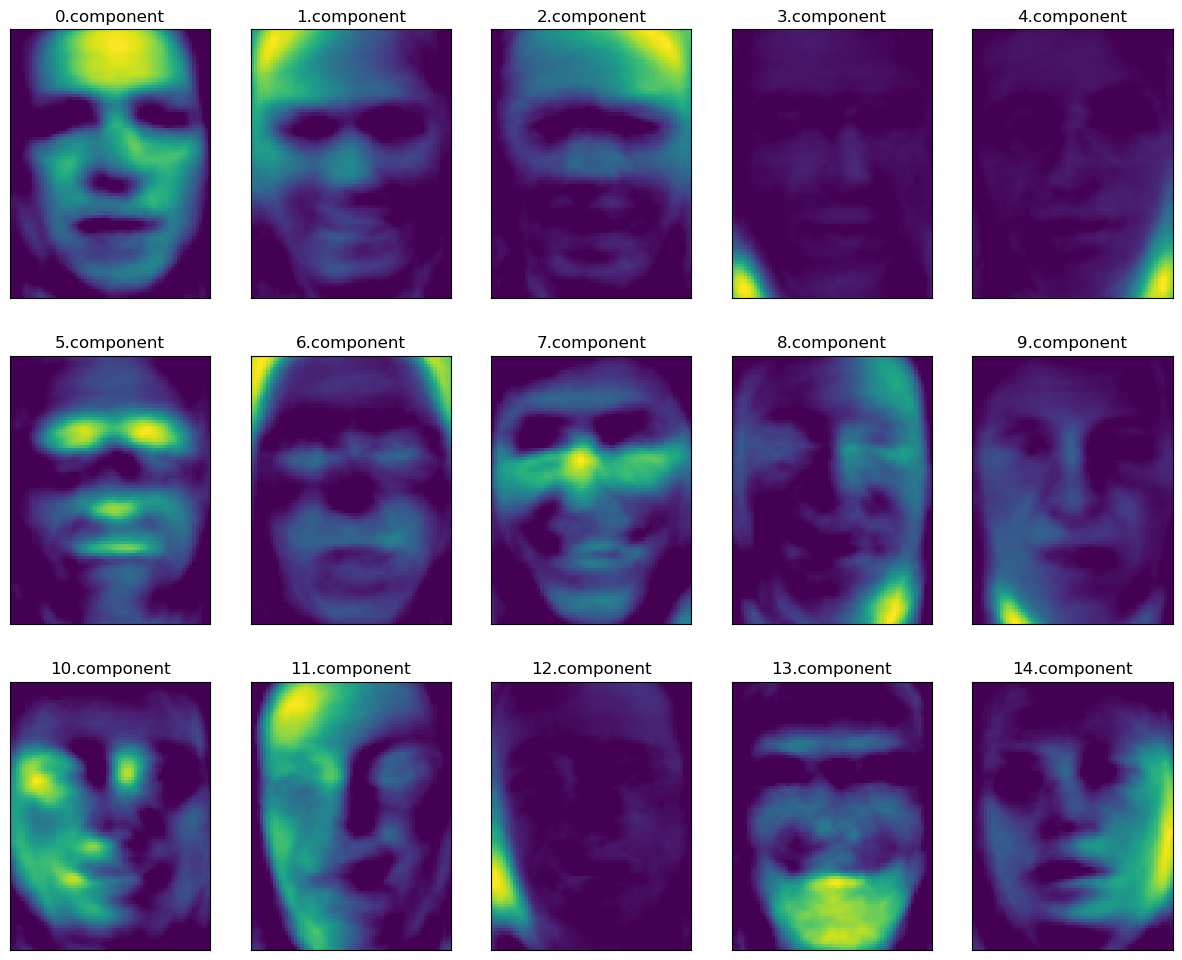

In [76]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5, figsize=(15,12),
                         subplot_kw={'xticks':(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}.component'.format(i))
    

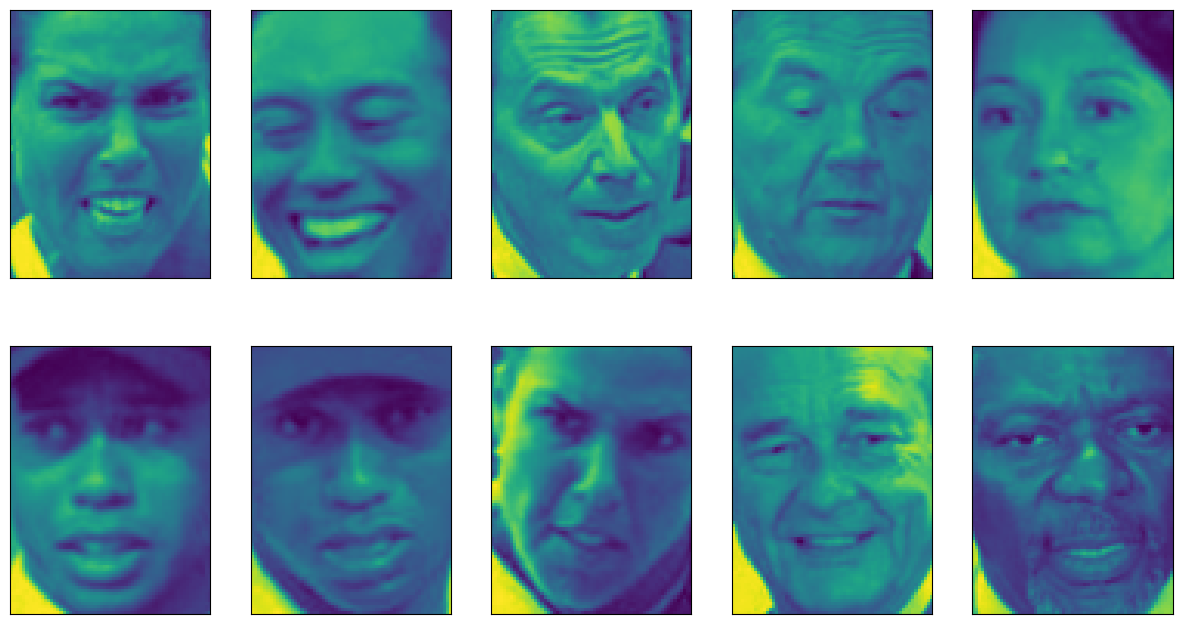

In [78]:
compn = 3

inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8),
                         subplot_kw={'xticks': (), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

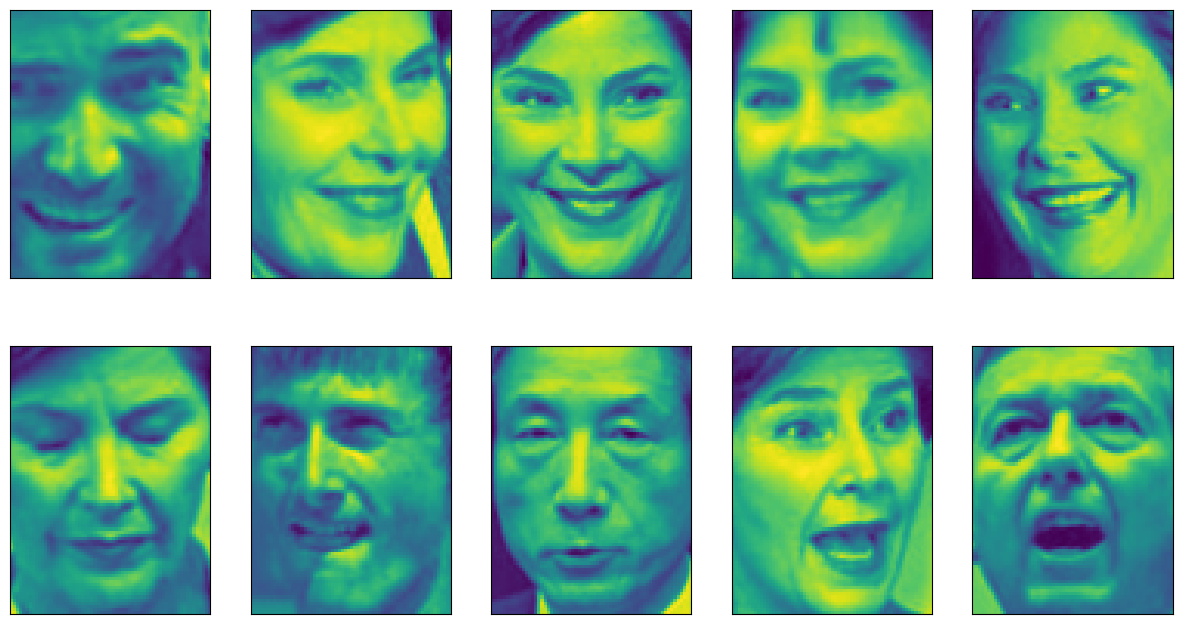

In [79]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8),
                        subplot_kw={'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

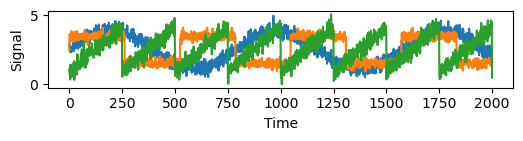

In [81]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [82]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print('Shape of measurements:{}'.format(X.shape))

Shape of measurements:(2000, 100)


In [83]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('Recovered signal shape:{}'.format(S_.shape))

Recovered signal shape:(2000, 3)


In [84]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

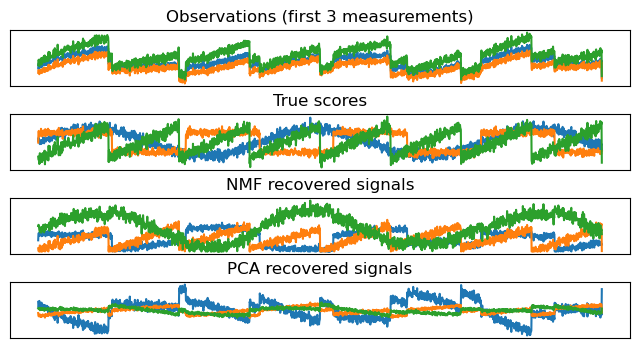

In [86]:
models = [X,S,S_,H]
names = ['Observations (first 3 measurements)', 
        'True scores',
        'NMF recovered signals',
        'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': 0.5},
                        subplot_kw={'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3],'-')

### Manifold Learning with t-SNE

In [87]:
from sklearn.datasets import load_digits

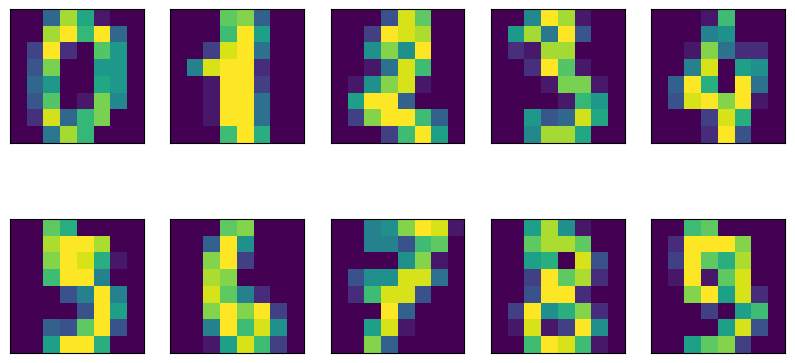

In [90]:
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

/var/folders/m7/q9jqt2zs3b1b4t81n_tpn1lh0000gn/T/ipykernel_72468/47304369.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(digits_pca[:,1].max(), digits_pca[:,1].max())


Text(0, 0.5, 'Second principal component')

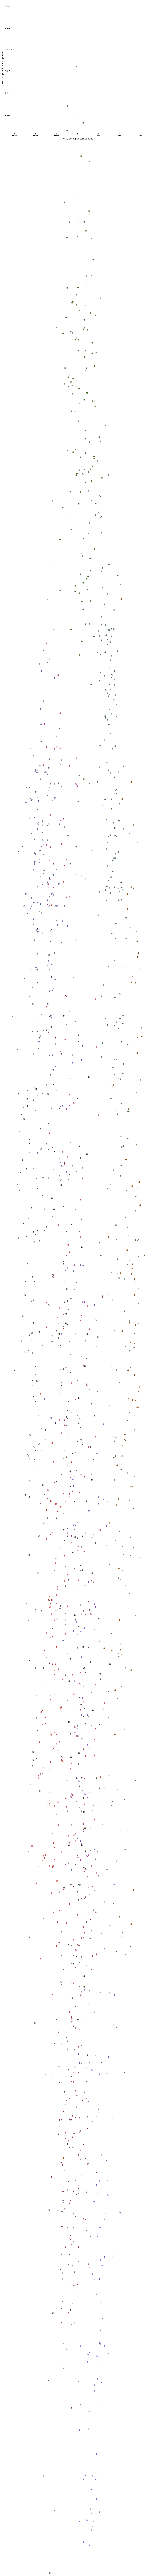

In [95]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].max(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [96]:
from sklearn.manifold import TSNE

Text(0.5, 0, 't-SNE feature 1')

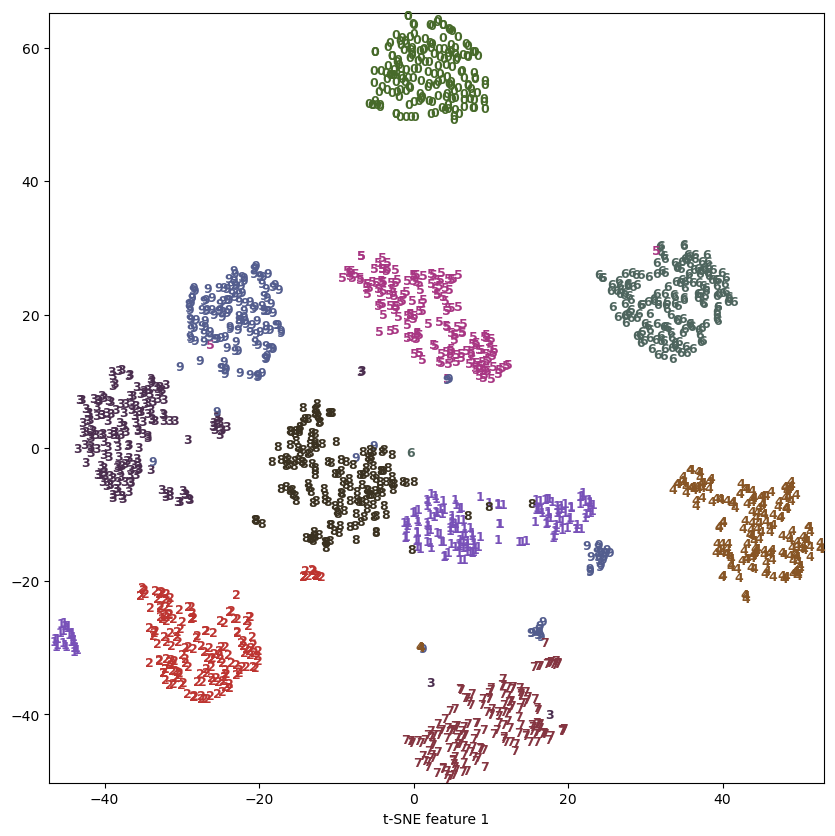

In [101]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1) 
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1) 
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

## Clustering

### k-Means Clustering

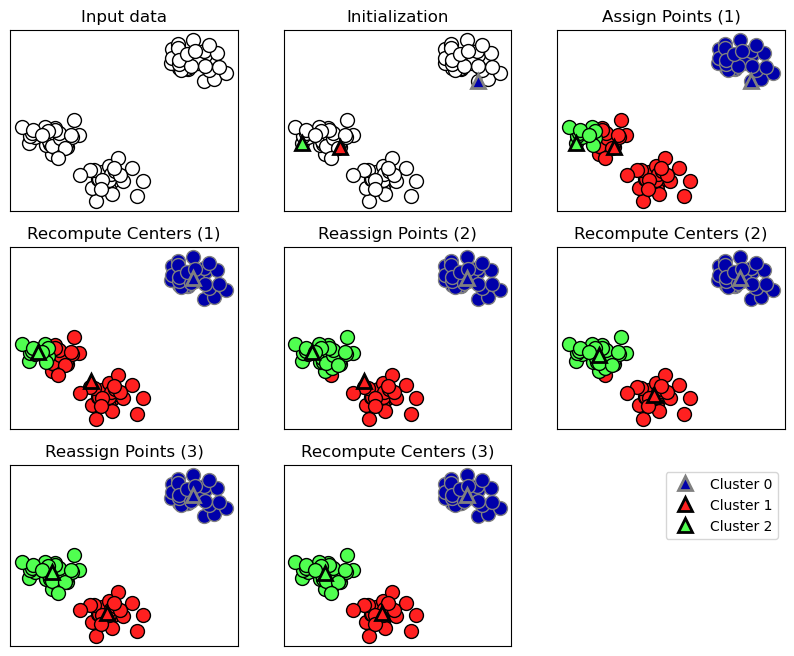

In [3]:
mglearn.plots.plot_kmeans_algorithm()

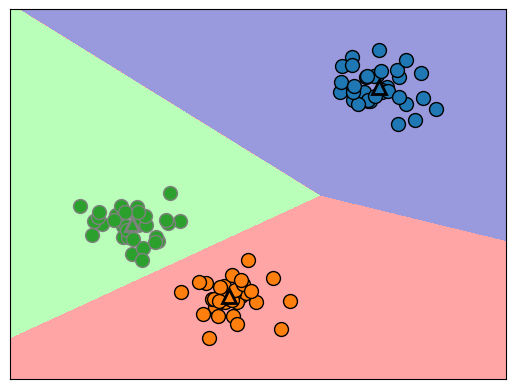

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [7]:
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
print('Cluster memberships:\n{}'.format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [9]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


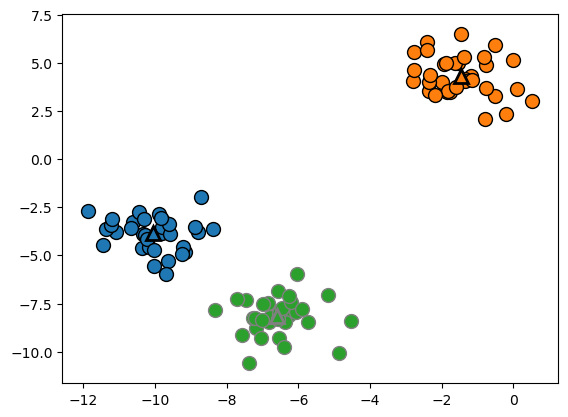

In [12]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2);

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


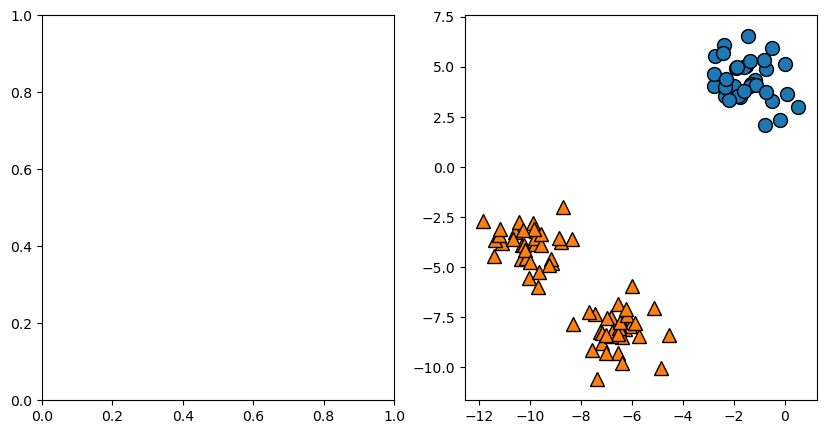

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1]);

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


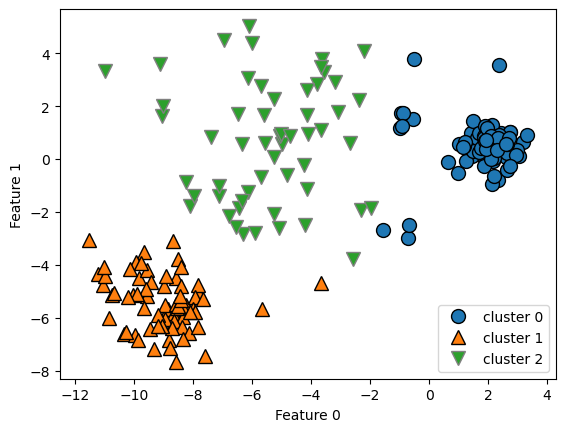

In [23]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


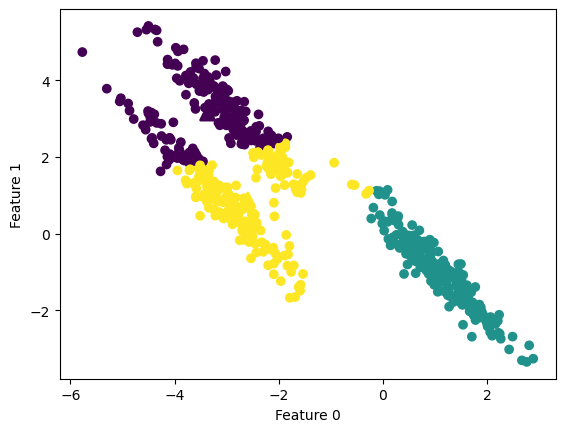

In [26]:
X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[0,1,2], s=100, linewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [28]:
from sklearn.datasets import make_moons

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


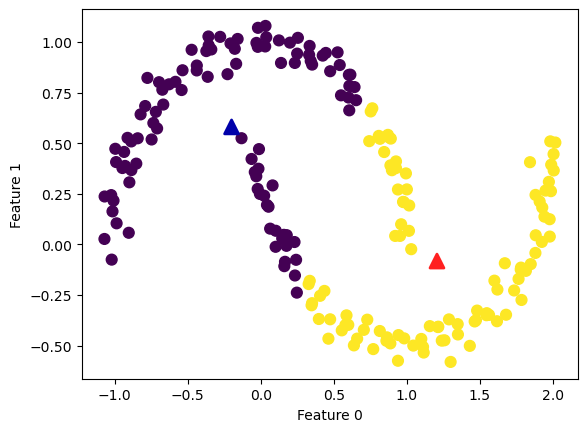

In [31]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], 
           s=100, linewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

In [49]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_train = train_test_split(X_people, 
                                                     y_people, 
                                                     stratify=y_people, 
                                                     random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmean = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


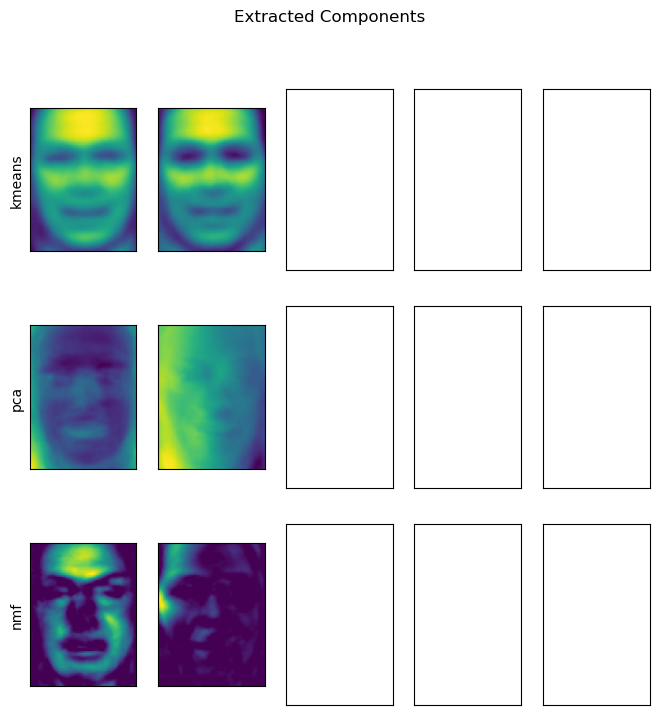

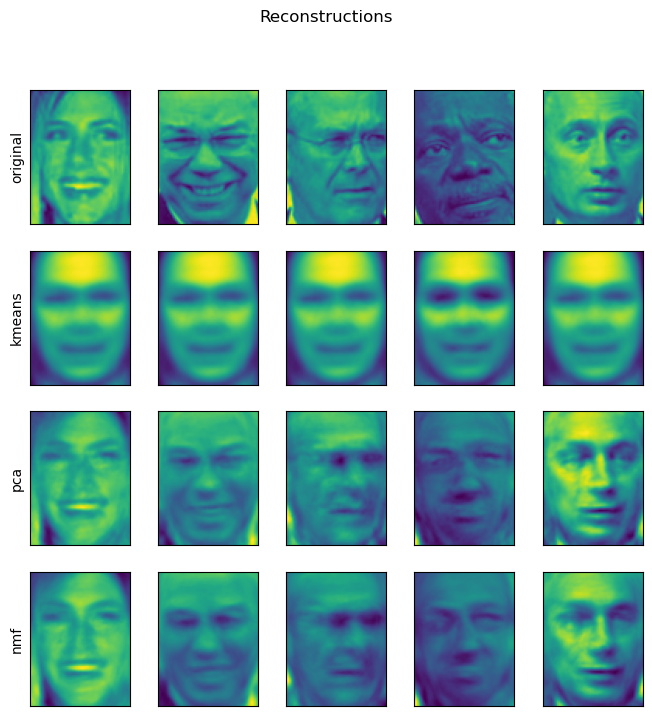

In [61]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
            axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
        ax[0].imshow(comp_kmeans.reshape(image_shape))
        ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
        ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

### 

fig,axes = plt.subplots(4,5, subplot_kw={'xticks':(), 'yticks':()}, 
                       figsize=(8,8))
fig.suptitle('Reconstructions')

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T,
                                                 X_test,
                                                 X_reconstructed_kmeans,
                                                 X_reconstructed_pca,
                                                 X_reconstructed_nmf):
        ax[0].imshow(orig.reshape(image_shape))
        ax[1].imshow(rec_kmeans.reshape(image_shape))
        ax[2].imshow(rec_pca.reshape(image_shape))
        ax[3].imshow(rec_nmf.reshape(image_shape))
        
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf");


Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


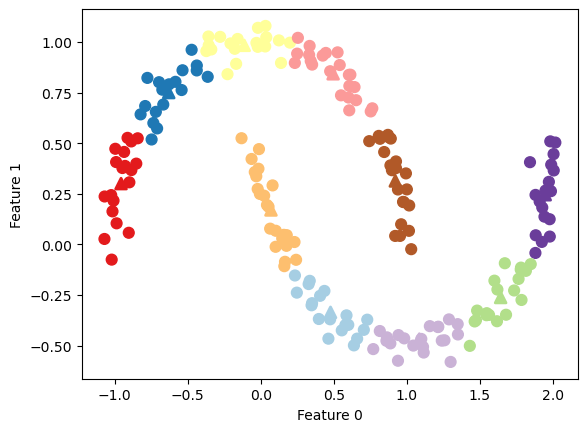

In [62]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred));

In [66]:
distance_features = kmeans.transform(X)
print('Distance feature shape:{}'.format(distance_features.shape))
print('Distance features:\n{}'.format(distance_features))

Distance feature shape:(200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### Agglomerative Clustering

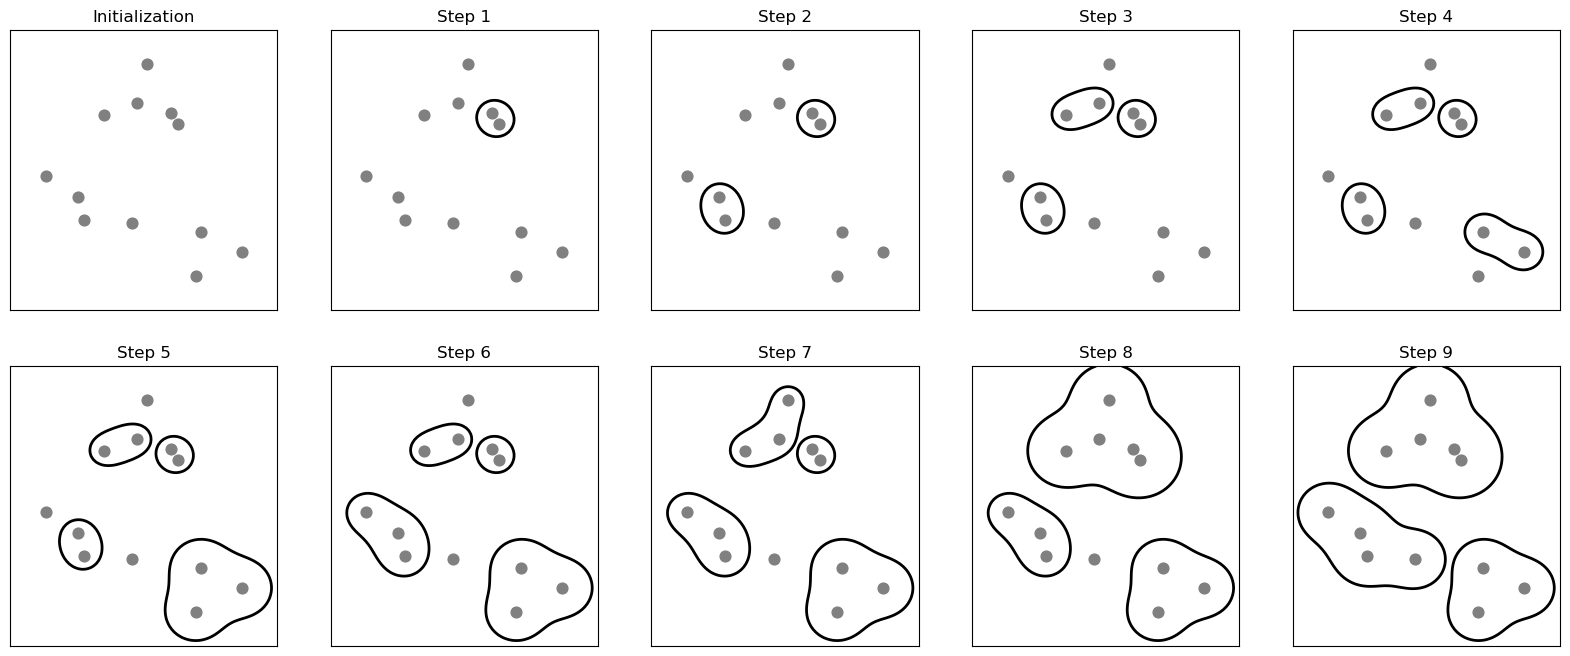

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


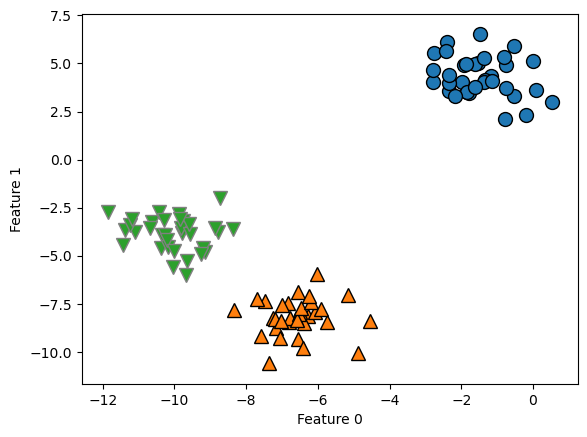

In [10]:
X,y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

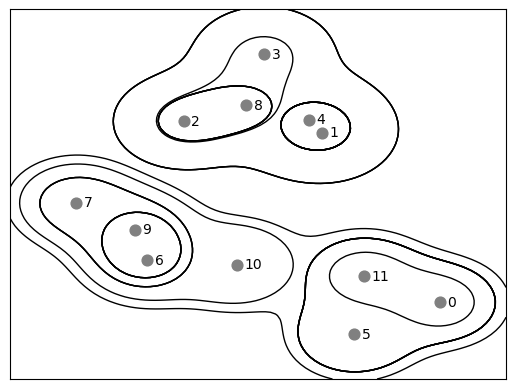

In [11]:
mglearn.plots.plot_agglomerative()

In [13]:
from scipy.cluster.hierarchy import dendrogram, ward

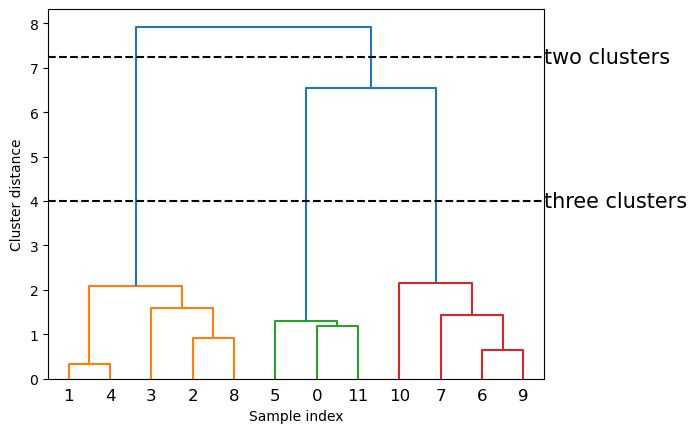

In [16]:
X,y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');


### DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
X,y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memebership:\n{}'.format(clusters))

Cluster memebership:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


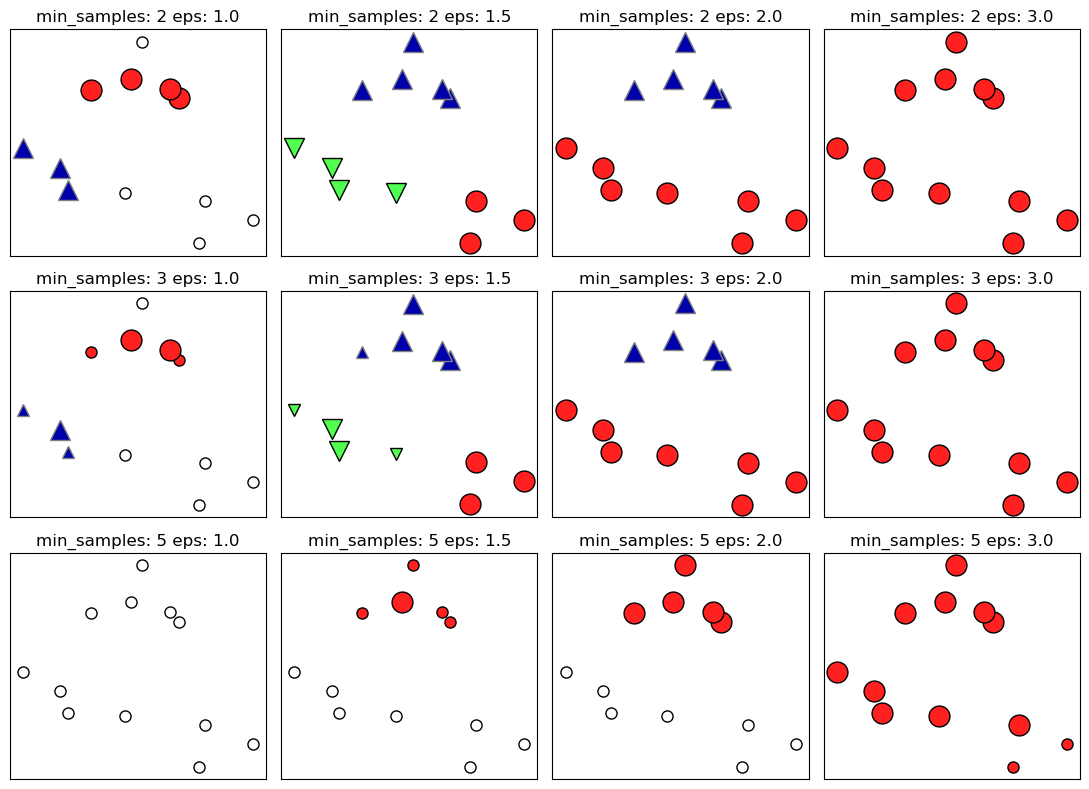

In [19]:
mglearn.plots.plot_dbscan()

In [26]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

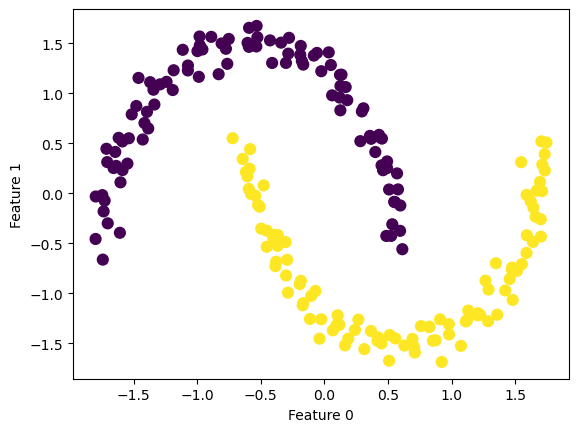

In [23]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

### Comparing and Evaulating Clustering Algorithms 

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

In [42]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


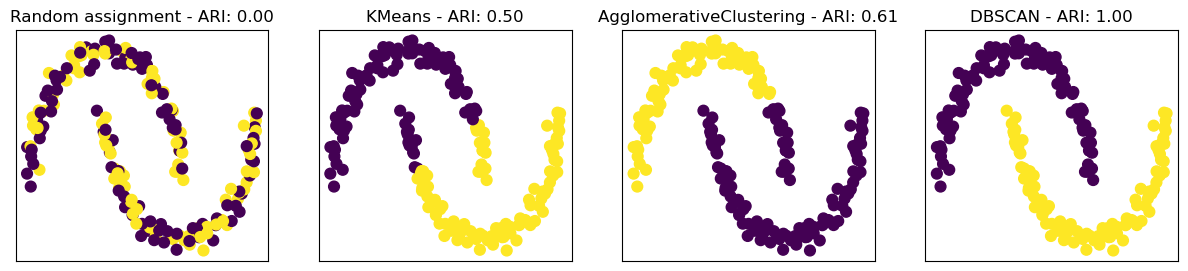

In [43]:
fig, axes = plt.subplots(1,4, figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y,clusters)))

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
print('Accuracy: {:.2f}'.format(accuracy_score(clusters1, clusters2)))
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


In [46]:
from sklearn.metrics.cluster import silhouette_score

In [47]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


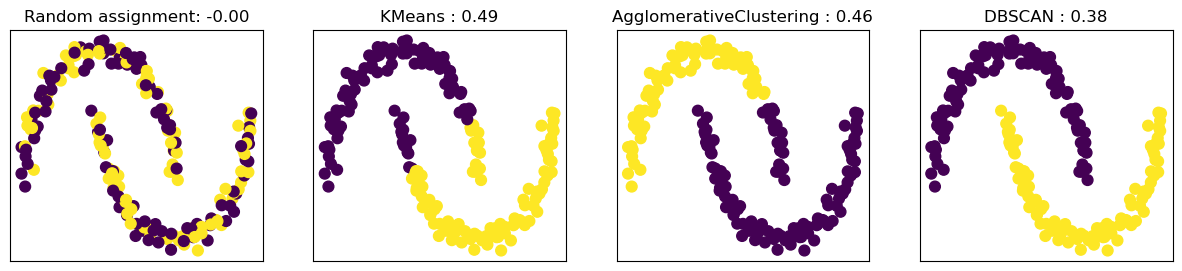

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(),'yticks':()})
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, s=60)
axes[0].set_title('Random assignment: {:.2f}'.format(silhouette_score(X_scaled, 
                                                                      random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, s=60)
    ax.set_title('{} : {:.2f}'.format(algorithm.__class__.__name__,
                                     silhouette_score(X_scaled, clusters)));


In [89]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split



In [90]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255.

X_train, X_test,y_train,y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

In [91]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [92]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [93]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [94]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1  0]


In [95]:
print('Number of points per cluster:{}'.format(np.bincount(labels+1)))

Number of points per cluster:[  29 1570]


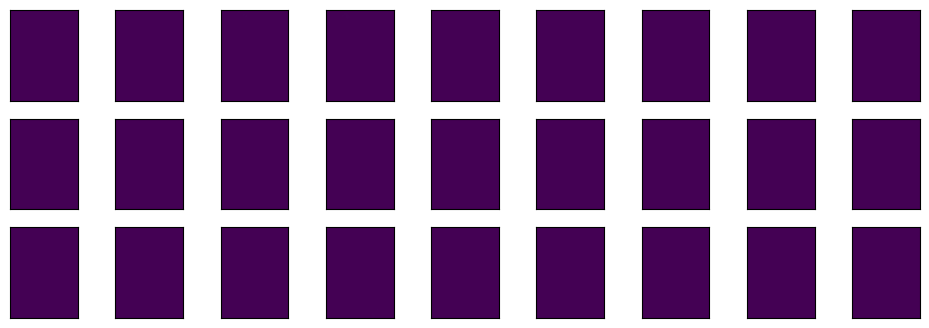

In [96]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3,9, subplot_kw={'xticks':(), 'yticks':()},
                       figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)


In [98]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('Clusters present:{}'.format(np.unique(labels)))
    print('Cluster sizes: {}'.format(np.bincount(labels+1)))


eps=1
Clusters present:[-1]
Cluster sizes: [1599]

eps=3
Clusters present:[-1]
Cluster sizes: [1599]

eps=5
Clusters present:[-1  0]
Cluster sizes: [1595    4]

eps=7
Clusters present:[-1  0  1  2  3  4  5  6  7  8  9 10]
Cluster sizes: [1510   44    3   15    3    5    3    3    3    3    3    4]

eps=9
Clusters present:[-1  0]
Cluster sizes: [930 669]

eps=11
Clusters present:[-1  0]
Cluster sizes: [ 315 1284]

eps=13
Clusters present:[-1  0]
Cluster sizes: [ 112 1487]


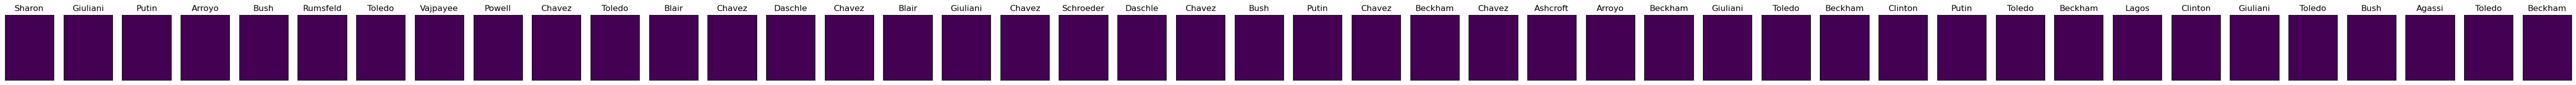

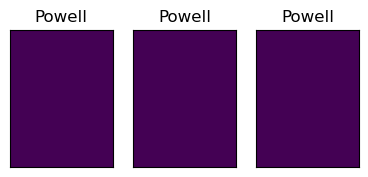

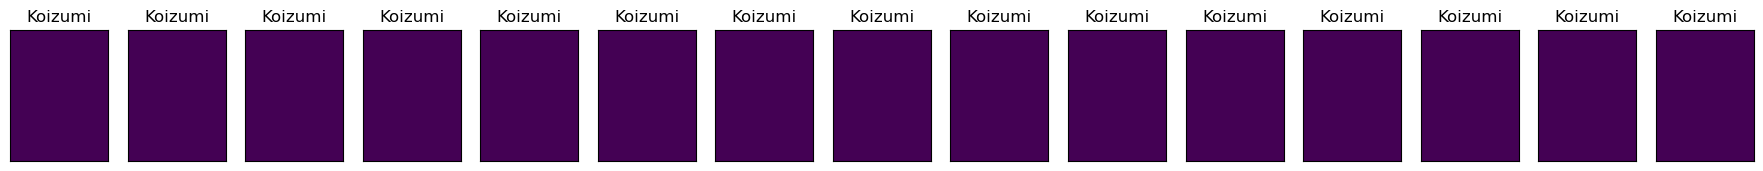

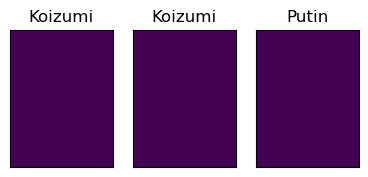

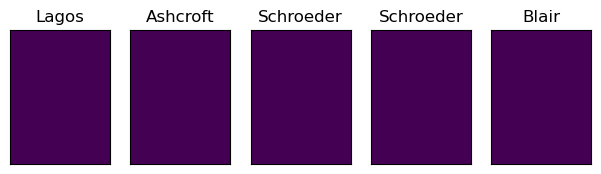

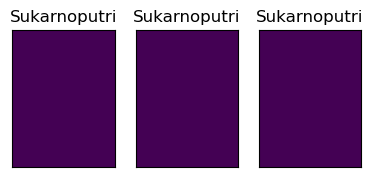

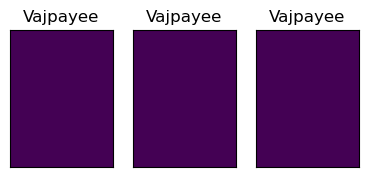

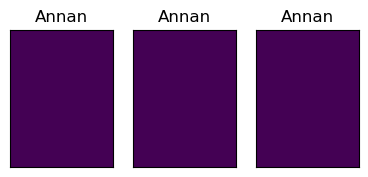

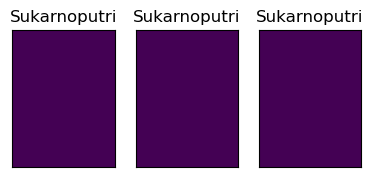

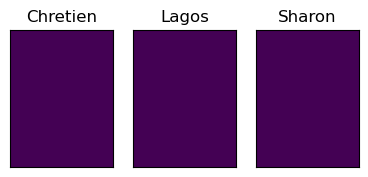

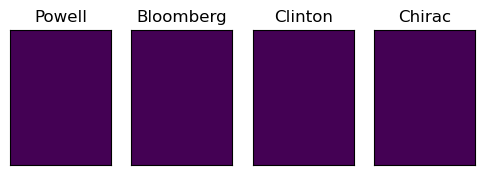

In [101]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels= dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels==cluster
    n_images = np.sum(mask)
    
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5,4),
                            subplot_kw={'xticks':(), 'yticks':()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [102]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('Cluster sizes k-means:{}'.format(np.bincount(labels_km)))

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster sizes k-means:[162 109  86 262  74 235 155 167 226 123]


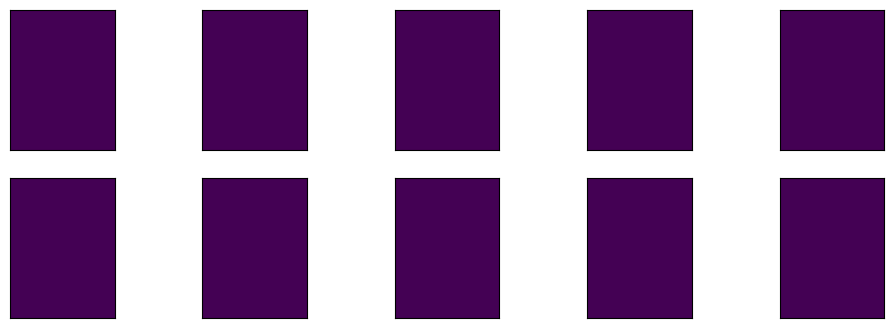

In [103]:
fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(),
                                         'yticks':()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
             vmin=0, vmax=1)


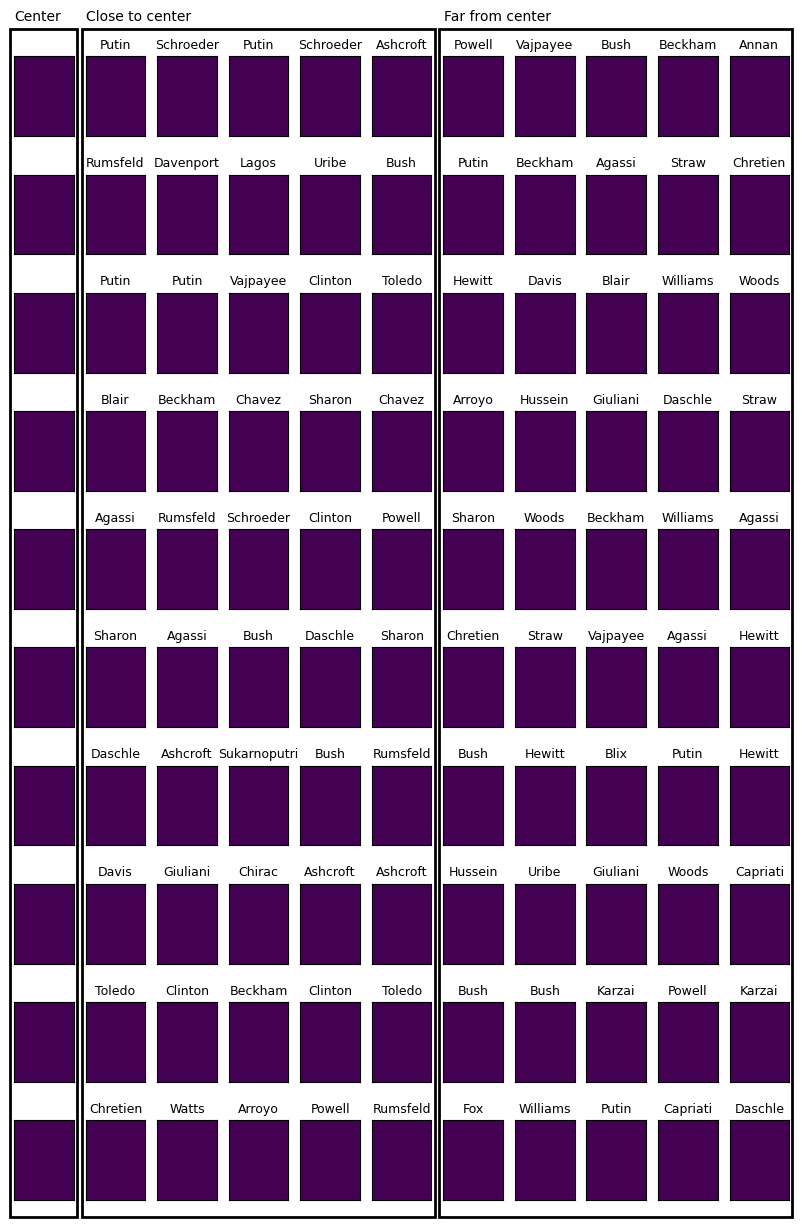

In [104]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                               y_people, people.target_names)

In [106]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Cluster sizes agglomerative clustering:{}'.format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering:[479  65 350 132  82 139  21 141  46 144]


In [107]:
print('ARI:{:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI:0.07


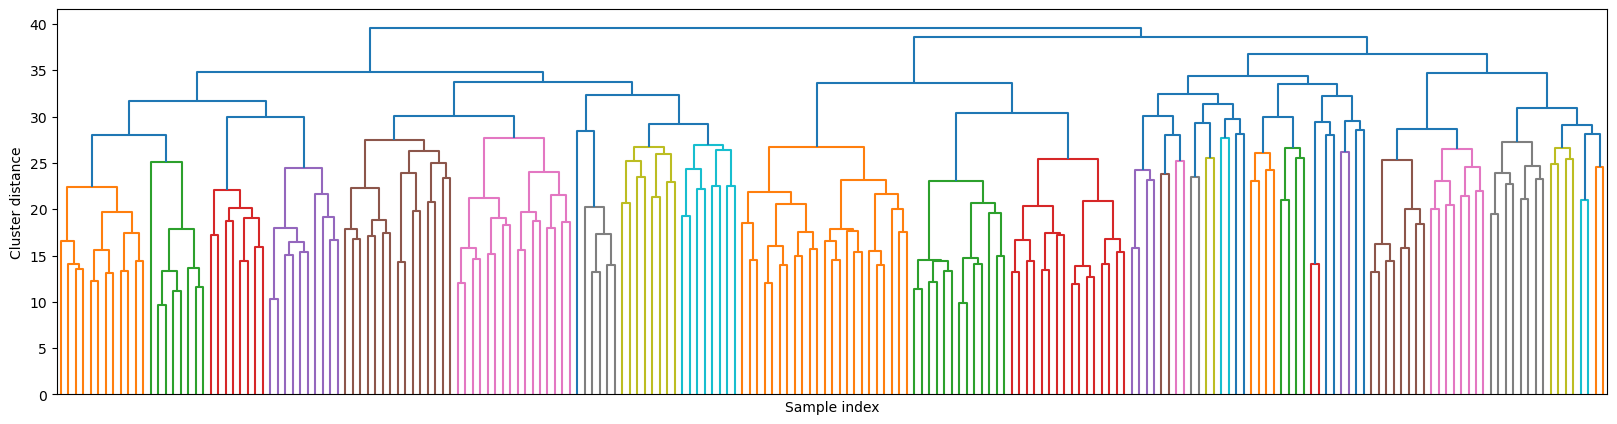

In [109]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

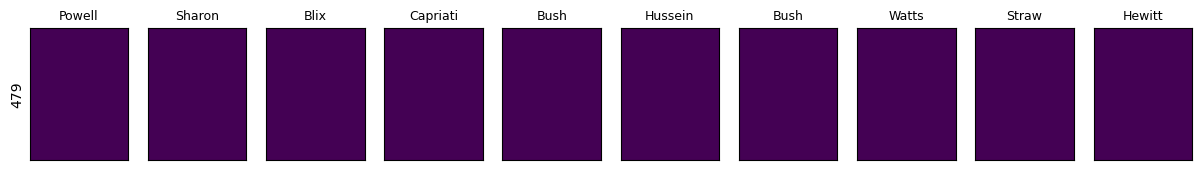

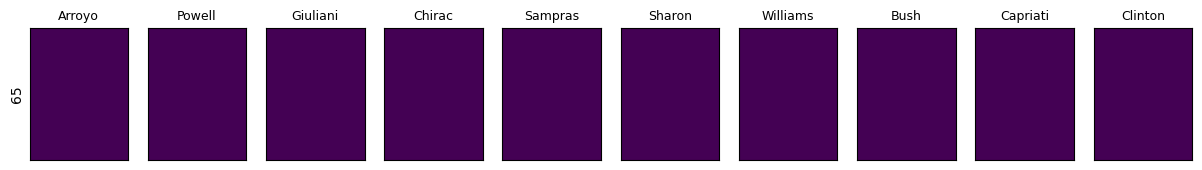

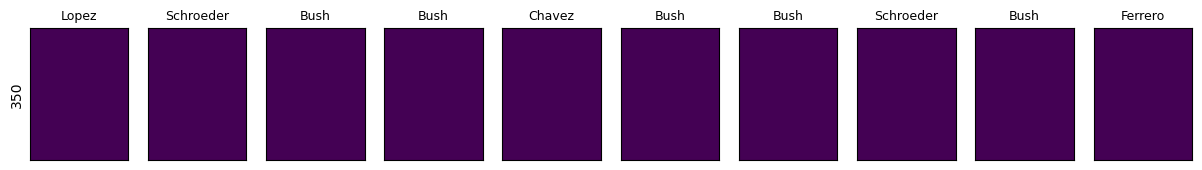

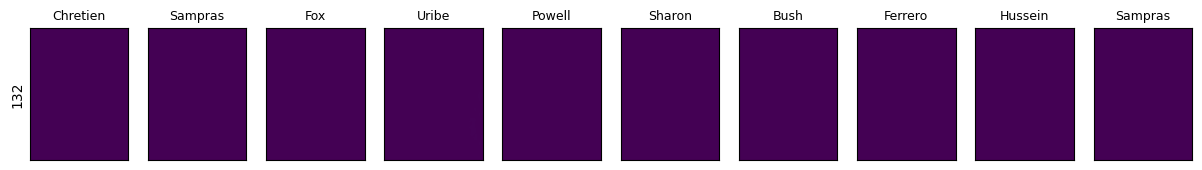

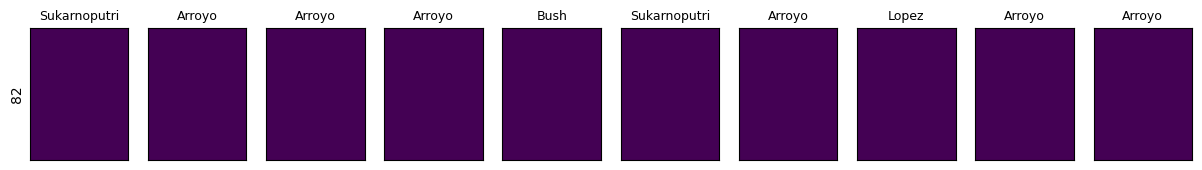

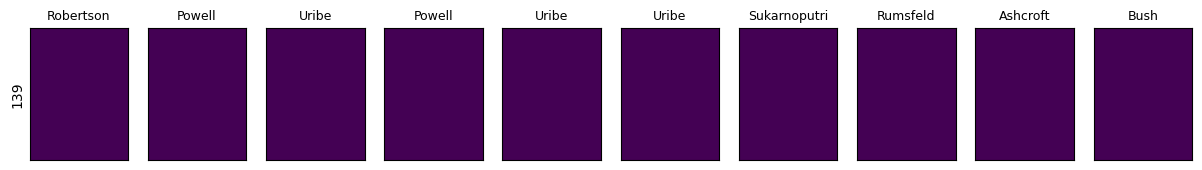

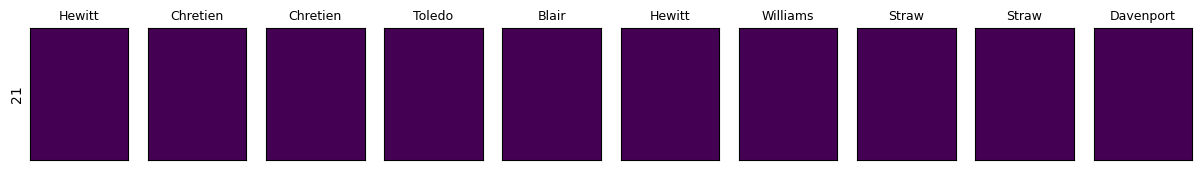

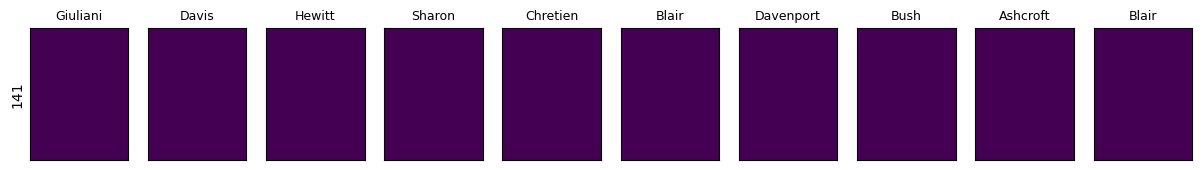

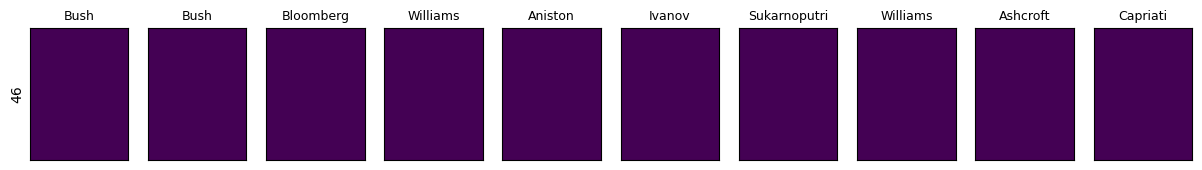

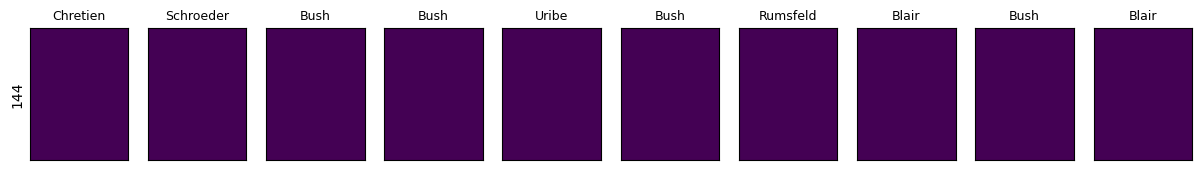

In [118]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg==cluster
    
    fig,axes = plt.subplots(1,10, 
                            subplot_kw={'xticks':(),'yticks':()},
                            figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))

    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                  labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize':9})

cluster sizes agglomerative clustering:[ 46  62 232  61   8  43 126  26  55  58  11 149  86  20   2   3  34  22
  17  53  10  13  12   2  33   4 119  29   2   1  25   4  28  17  29  26
  29  26  34  42]


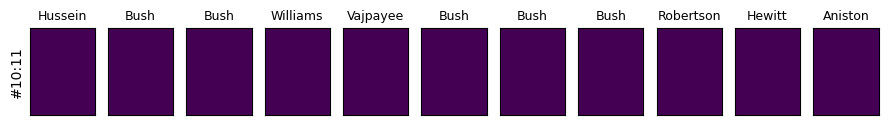

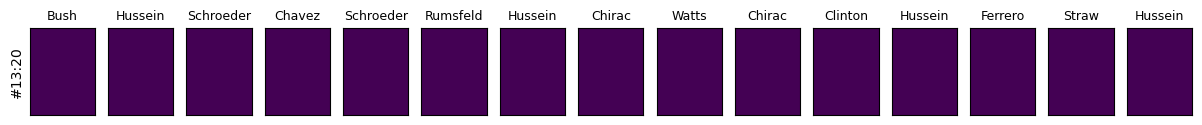

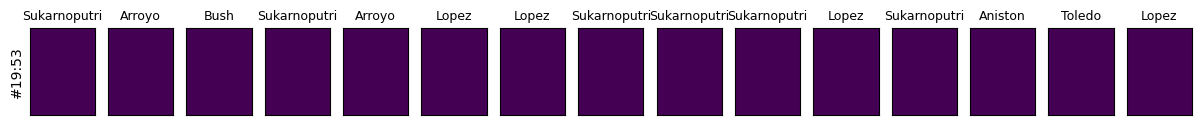

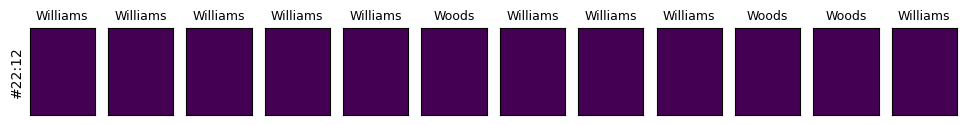

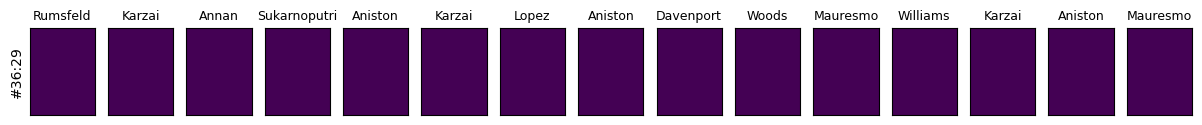

In [122]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('cluster sizes agglomerative clustering:{}'.format(np.bincount(labels_agg)))

n_clusters=40
for cluster in [10,13,19,22,36]:
    mask = labels_agg==cluster
    
    fig,axes = plt.subplots(1,15, subplot_kw={'xticks':(), 'yticks':()},
                           figsize=(15,8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}:{}'.format(cluster, cluster_size))
    
    for image, label, asdf, ax in zip(X_people[mask], 
                                      y_people[mask],
                                      labels_agg[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize':9})
        
        for i in range(cluster_size,15):
            axes[i].set_visible(False)

# 4. Representing Data and Engineering Features 

## Categorical Variables

### One-Hot-Encoding (Dummy Variables)

In [123]:
import pandas as pd

In [125]:
data = pd.read_csv('/Users/slp22/code/python3-bootcamp/adult.data',
                  header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education',  
                         'education-num','marital-status', 'occupation', 
                         'relationship', 'race', 'gender','capital-gain', 
                         'capital-loss', 'hours-per-week', 'native-country',
                         'income'])
data = data[['age','workclass','education','gender','hours-per-week',
            'occupation','income']]
display(data.head())





age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [126]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [127]:
print('Original features:\n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n', list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [128]:
data_dummies.head()

age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0   39              40             0                       0   
1   50              13             0                       0   
2   38              40             0                       0   
3   53              40             0                       0   
4   28              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   

   ...  occupation_ Machine-op-inspct  occupation_ Other-service  \
0  ...                              0                          0   
1  ...                              0                          0   
2  ...                              0                          0   
3  ...                              0                          0   
4  ...                              0                          0   

   occupation_ Priv-house-serv  occupation_ Prof-specialty  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           1   

   occupation_ Protective-serv  occupation_ Sales  occupation_ Tech-support  \
0                            0                  0                         0   
1                            0                  0                         0   
2                            0                  0                         0   
3                            0                  0                         0   
4                            0                  0                         0   

   occupation_ Transport-moving  income_ <=50K  income_ >50K  
0                             0              1             0  
1                             0              1             0  
2                             0              1             0  
3                             0              1             0  
4                             0              1             0  

[5 rows x 46 columns]

In [140]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving'] # Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test score:{:.2f}'.format(logreg.score(X_test,y_test)))

Test score:0.81


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Numbers Can Encode Categoricals

In [148]:
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1],
                       'Categorical Feature': ['socks','fox',
                                               'socks','box']})
display(demo_df)

Integer Feature Categorical Feature
0                0               socks
1                1                 fox
2                2               socks
3                1                 box

In [149]:
pd.get_dummies(demo_df)

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

In [150]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature','Categorical Feature'])

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

## Binning, Discretization, Linear Models, and Trees

## Interactions and Polynomials

## Univariate Nonlinear Transformations

## Automatic Feature Selection

### Univariate Statistics

### Model-Based Feature Selection

### Iterative Feature Selection

## Utlilizing Expert Knowledge

# 5. Model Evaluation and Improvement

## Cross-Validation

## Grid Search

## Evaluation Metrics and Scoring

# 6. Algorithm Chains and Pipelines

## Parameter Selection with Preprocessing

## Building Pipelines

## Using Pipelines in Grid Searches

## The General Pipeline Interface

## Grid-Searching Preprocessing Steps and Model Parameters

## Grid-Searching Which Model to Use

# 7. Working with Text Data

# 8. Wrapping Up